In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
import missingno as msno
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings('always')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
plt.style.use("bmh")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.decomposition import PCA
import statsmodels.api as sm

#classifiaction.
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC,SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn import metrics


# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
# !conda install -c conda-forge fbprophet -y
# from fbprophet import Prophet

In [715]:
train_ = pd.read_csv('train.csv',parse_dates = True, low_memory = False, index_col = 'Date')
df_=train_.copy()
df_ = df_.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [2]:
train = pd.read_csv('train.csv')
df=train.copy()

In [3]:
df = df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [4]:
df['Date']= pd.to_datetime(df['Date'])
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Day_of_Week'] = df.Date.dt.dayofweek
df['Day_of_Week_name'] = df.Date.dt.day_name()
df['Week_of_year'] = df.Date.dt.weekofyear

In [719]:
# df.y.pct_change(fill_method='ffill',periods=-1)
# df.y.diff(periods=-1)
# df.resample('M', on = 'Date')['Day_of_Week'].mean().plot()

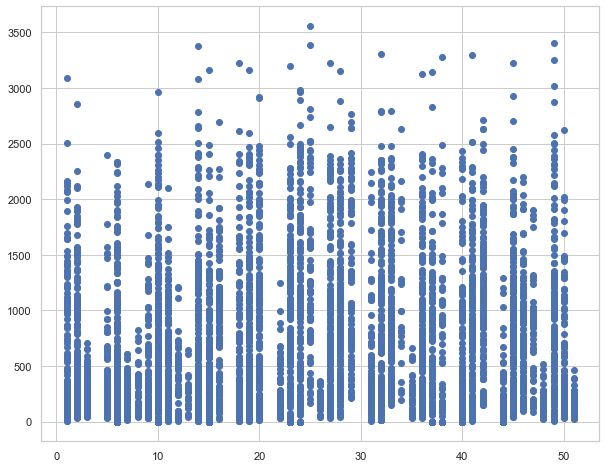

In [720]:
plt.figure(figsize=(10,8))
plt.plot(df.Week_of_year,df.y,'o')

In [721]:
df['rental_per_Day'] = df['y'] / df['Day']

In [722]:
df.rental_per_Day

0       21.166667
1       17.000000
2       14.416667
3        8.916667
4        6.500000
          ...    
5755    65.850000
5756    53.900000
5757    51.000000
5758    46.100000
5759    18.900000
Name: rental_per_Day, Length: 5760, dtype: float64

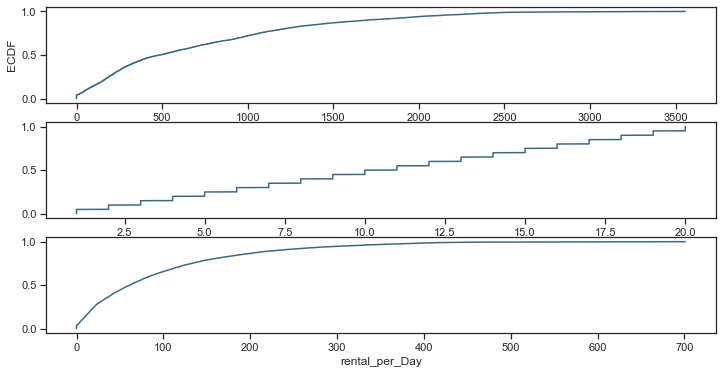

In [723]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(df['y'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('rental'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(df['Day'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Day');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(df['rental_per_Day'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('rental_per_Day');

In [724]:
df[df.y ==0]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Seasons,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0


In [725]:
df[df.Functioning_Day ==0]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Seasons,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day


In [726]:
df[(df.Functioning_Day ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Seasons,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day


In [727]:
df[(df.Snowfall ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Seasons,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,Spring,No Holiday,No,4,11,2018,6,Sunday,44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,Autumn,No Holiday,No,11,9,2018,1,Tuesday,37,0.0


In [728]:
df['Day_not_rental'] = np.where((df.y ==0),1,0)

In [729]:
df.Day_not_rental.value_counts()

0    5513
1     247
Name: Day_not_rental, dtype: int64

In [730]:
df[(df.Functioning_Day ==0) & (df.Functioning_Day ==0) & (df.Snowfall ==0) &(df.Solar_Radiation ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental


In [731]:
df[(df.Functioning_Day !=0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1


In [732]:
df[(df.Holiday ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental


In [733]:
df[(df.Rainfall ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1


In [734]:
df[(df.Solar_Radiation ==0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1


In [735]:
df[(df.Holiday !=0) & (df.y ==0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental
2160,2160,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2161,2161,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2162,2162,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2163,2163,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
2164,2164,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,...,No Holiday,No,4,11,2018,6,Sunday,44,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5491,2018-09-11,0,19,11.9,71,2.7,589,6.7,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5492,5492,2018-09-11,0,20,11.9,72,2.5,526,7.0,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5493,5493,2018-09-11,0,21,11.4,74,1.9,498,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1
5494,5494,2018-09-11,0,22,11.2,75,1.7,478,6.9,0.0,...,No Holiday,No,11,9,2018,1,Tuesday,37,0.0,1


In [736]:
df[(df.Functioning_Day !=0) & (df.y !=0)]

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,Holiday,Functioning_Day,Day,Month,Year,Day_of_Week,Day_of_Week_name,Week_of_year,rental_per_Day,Day_not_rental
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,No Holiday,Yes,12,1,2017,3,Thursday,2,21.166667,0
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,No Holiday,Yes,12,1,2017,3,Thursday,2,17.000000,0
2,2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,No Holiday,Yes,12,1,2017,3,Thursday,2,14.416667,0
3,3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,No Holiday,Yes,12,1,2017,3,Thursday,2,8.916667,0
4,4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,No Holiday,Yes,12,1,2017,3,Thursday,2,6.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,2018-11-20,1317,19,8.7,34,2.2,1857,-6.3,0.0,...,No Holiday,Yes,20,11,2018,1,Tuesday,47,65.850000,0
5756,5756,2018-11-20,1078,20,8.5,32,2.6,1789,-7.2,0.0,...,No Holiday,Yes,20,11,2018,1,Tuesday,47,53.900000,0
5757,5757,2018-11-20,1020,21,8.8,37,3.8,1750,-5.1,0.0,...,No Holiday,Yes,20,11,2018,1,Tuesday,47,51.000000,0
5758,5758,2018-11-20,922,22,8.9,40,3.4,1810,-3.9,0.0,...,No Holiday,Yes,20,11,2018,1,Tuesday,47,46.100000,0


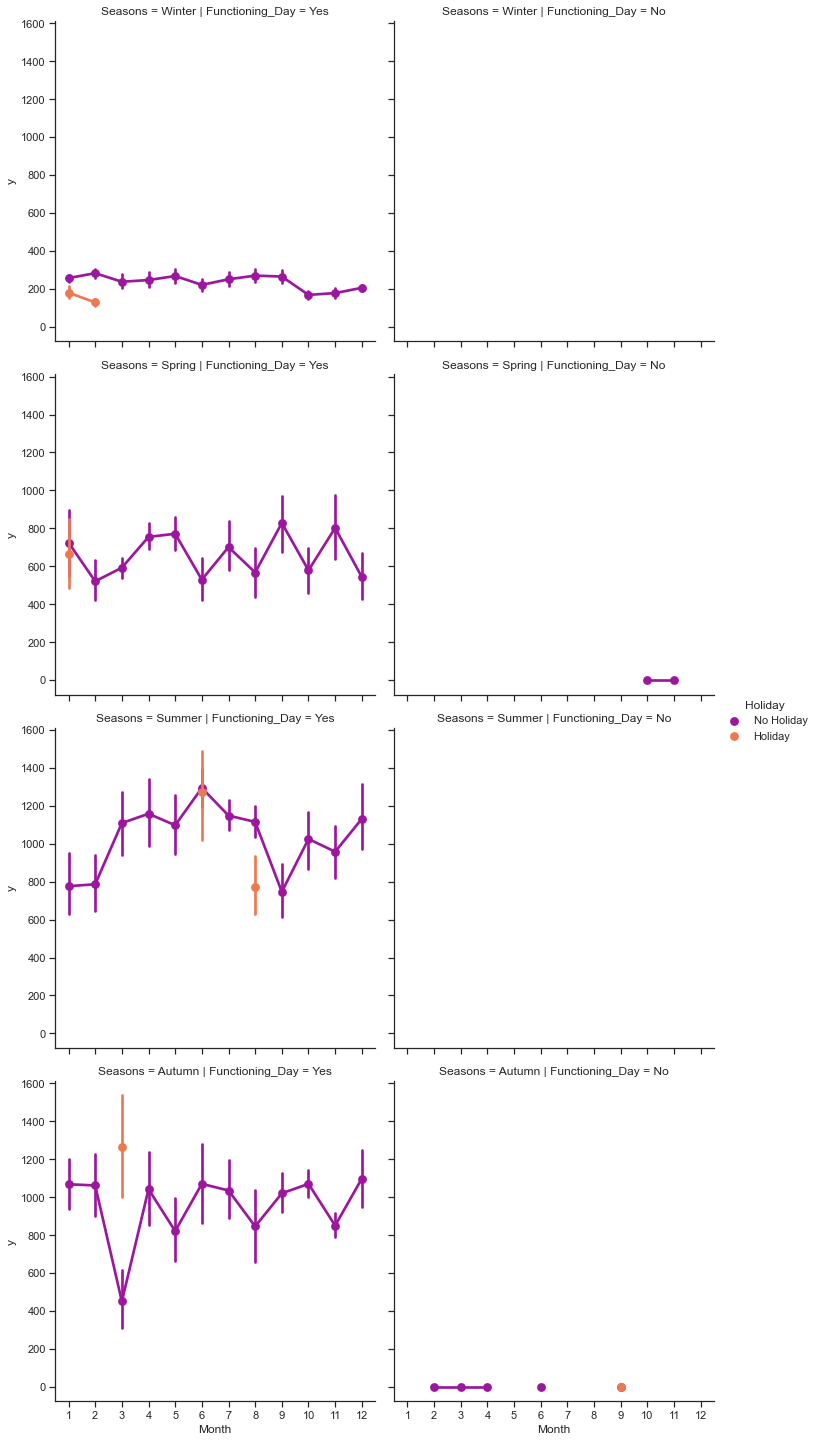

In [737]:
sns.factorplot(data = df, x = 'Month', y = "y", 
               col = 'Functioning_Day', # per store type in cols
               palette = 'plasma',
               hue = 'Holiday',
               row = 'Seasons', # per promo in the store in rows
               color = c) 

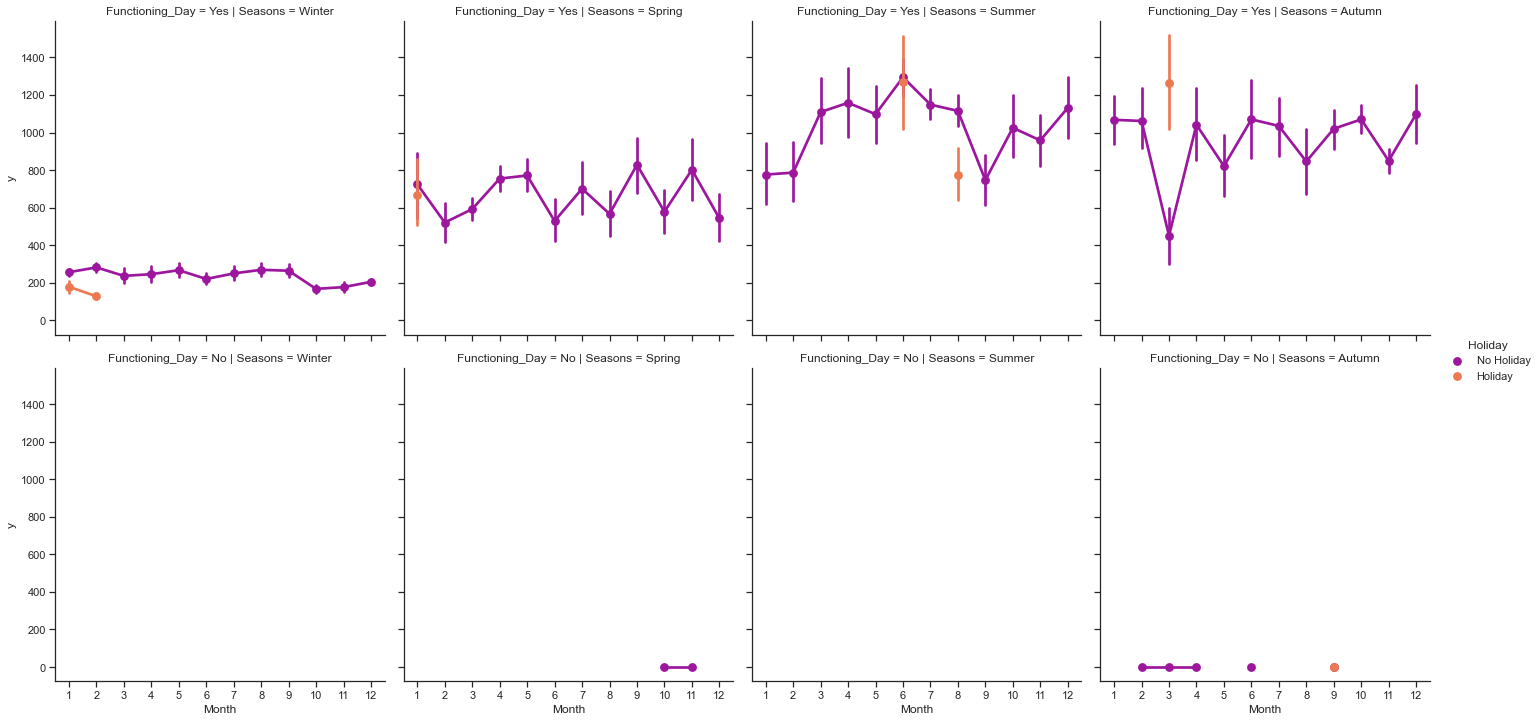

In [738]:
sns.factorplot(data = df, x = 'Month', y = "y", 
               col = 'Seasons', # per store type in cols
               palette = 'plasma',
               hue = 'Holiday',
               row = 'Functioning_Day', # per promo in the store in rows
               color = c) 

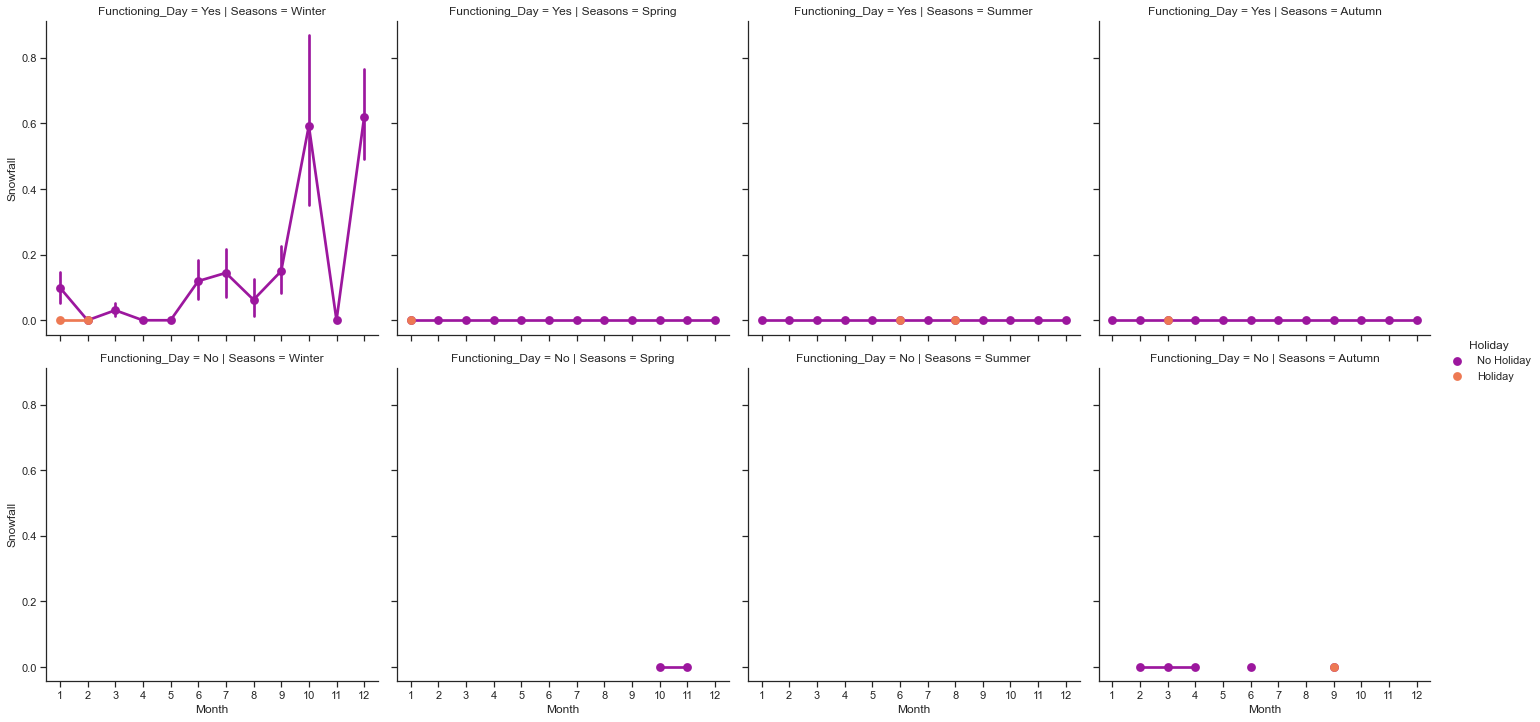

In [739]:
sns.factorplot(data = df, x = 'Month', y = "Snowfall", 
               col = 'Seasons', # per store type in cols
               palette = 'plasma',
               hue = 'Holiday',
               row = 'Functioning_Day', # per promo in the store in rows
               color = c) 

In [740]:
df[(df.Holiday == 1) & (df.Day_of_Week == 6)]['y'].unique()

array([], dtype=int64)

In [741]:
df[(df.Holiday == 1) & (df.Day_of_Week == 5)]['y'].unique()

array([], dtype=int64)

In [742]:
df[(df.Functioning_Day == 0) & (df.Day_of_Week == 6)]['y'].unique()

array([], dtype=int64)

In [743]:
df[(df.Functioning_Day == 0) & (df.Day_of_Week == 5)]['y'].unique()

array([], dtype=int64)

In [211]:
# corr_all = df.drop(['ID','Date'], axis = 1).corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr_all, dtype = np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize = (11, 9))

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_all, mask = mask,
#             square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
# plt.show()

In [744]:
df_['Year'] = df_.index.year
df_['Month'] = df_.index.month
df_['Day'] = df_.index.day
df_['WeekOfYear'] = df_.index.weekofyear

In [745]:
df_.Seasons.replace(['Winter', 'Spring', 'Summer', 'Autumn'],[4,1,2,3],inplace=True)
df_.Functioning_Day.replace(['Yes','No'],[1,0],inplace=True)
df_.Holiday.replace(['No Holiday', 'Holiday'],[0,1],inplace=True)

<AxesSubplot:xlabel='Date'>

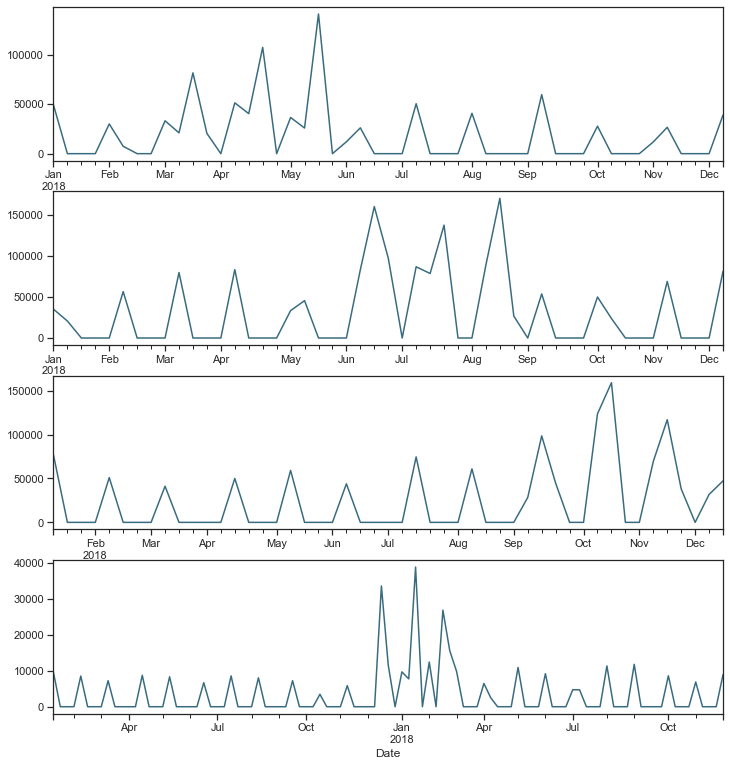

In [746]:
# df['Sales'] = df['Sales'] * 1.0

# store types
sales_a = df_[df_.Seasons == 1]['y']
sales_b = df_[df_.Seasons == 2]['y'].sort_index(ascending = True) # solve the reverse order
sales_c = df_[df_.Seasons == 3]['y']
sales_d = df_[df_.Seasons == 4]['y']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

<AxesSubplot:xlabel='Date'>

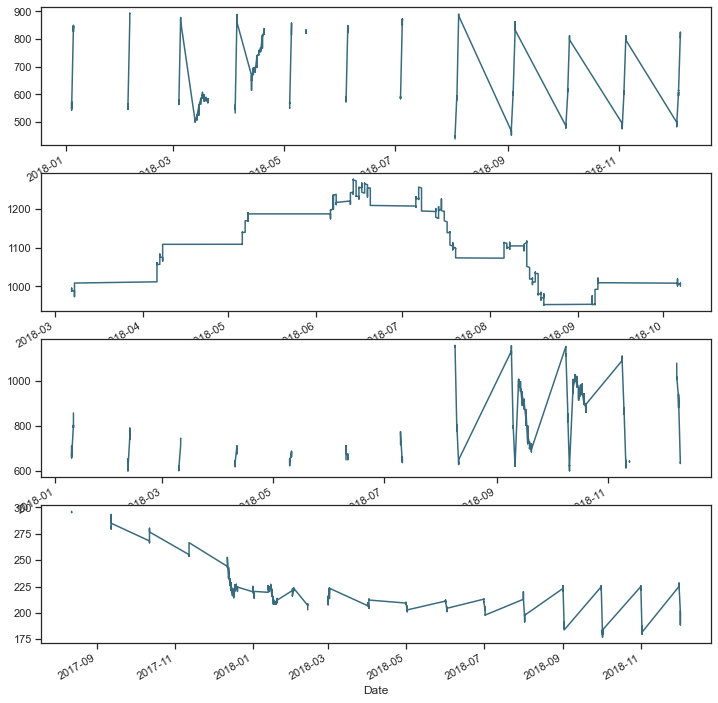

In [748]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = c, ax = ax4)

<AxesSubplot:xlabel='Date'>

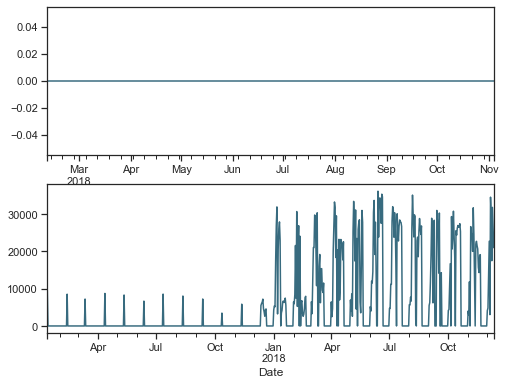

In [749]:
sales_a = df_[df_.Functioning_Day == 0]['y']
sales_b = df_[df_.Functioning_Day == 1]['y'].sort_index(ascending = True) # solve the reverse order


f, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

# store types
sales_a.resample('D').sum().plot(color = c, ax = ax1)
sales_b.resample('D').sum().plot(color = c, ax = ax2)

<AxesSubplot:xlabel='Date'>

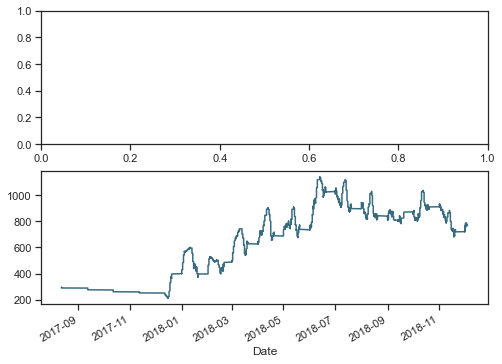

In [750]:
f, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

# monthly
# decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
# decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

<AxesSubplot:xlabel='Date'>

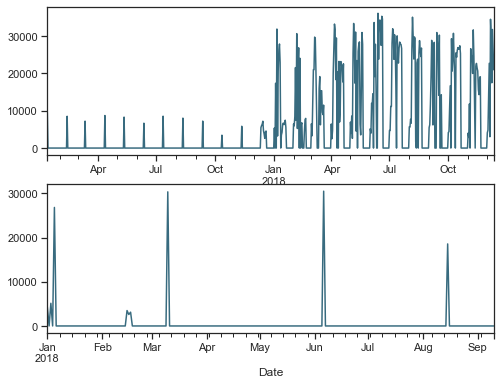

In [751]:
sales_a = df_[df_.Holiday == 0]['y']
sales_b = df_[df_.Holiday == 1]['y'].sort_index(ascending = True) # solve the reverse order


f, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

# store types
sales_a.resample('D').sum().plot(color = c, ax = ax1)
sales_b.resample('D').sum().plot(color = c, ax = ax2)

<AxesSubplot:xlabel='Date'>

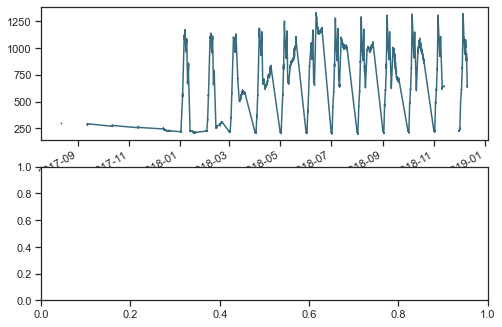

In [752]:
f, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

# decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
# decomposition_b.trend.plot(color = c, ax = ax2)

In [753]:
# plt.figure(figsize = (12, 8))

# # acf and pacf for A
# plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
# plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# # acf and pacf for B
# plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
# plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# # acf and pacf for C
# plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
# plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# # acf and pacf for D
# plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
# plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

# plt.show()

In [754]:
# df = df[(df.Functioning_Day != 0) & (df.y != 0)]

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

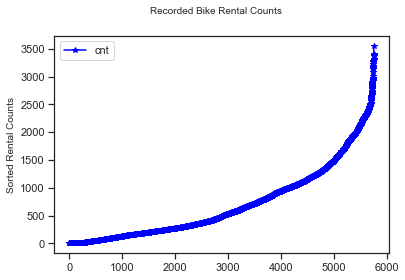

In [755]:
fig, ax = plt.subplots(1)
ax.plot(sorted(df['y']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

Text(0, 0.5, 'Count of all Biks Rented')

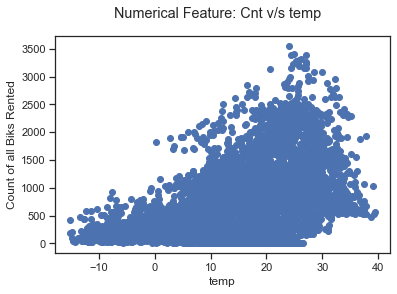

In [756]:
plt.scatter(df['Temperature'], df['y'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

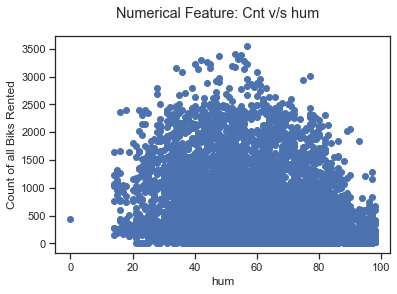

In [757]:
plt.scatter(df['Humidity'], df['y'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

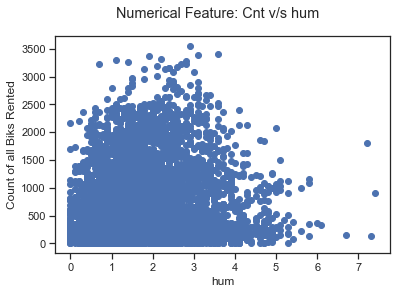

In [758]:
plt.scatter(df['Wind_speed'], df['y'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

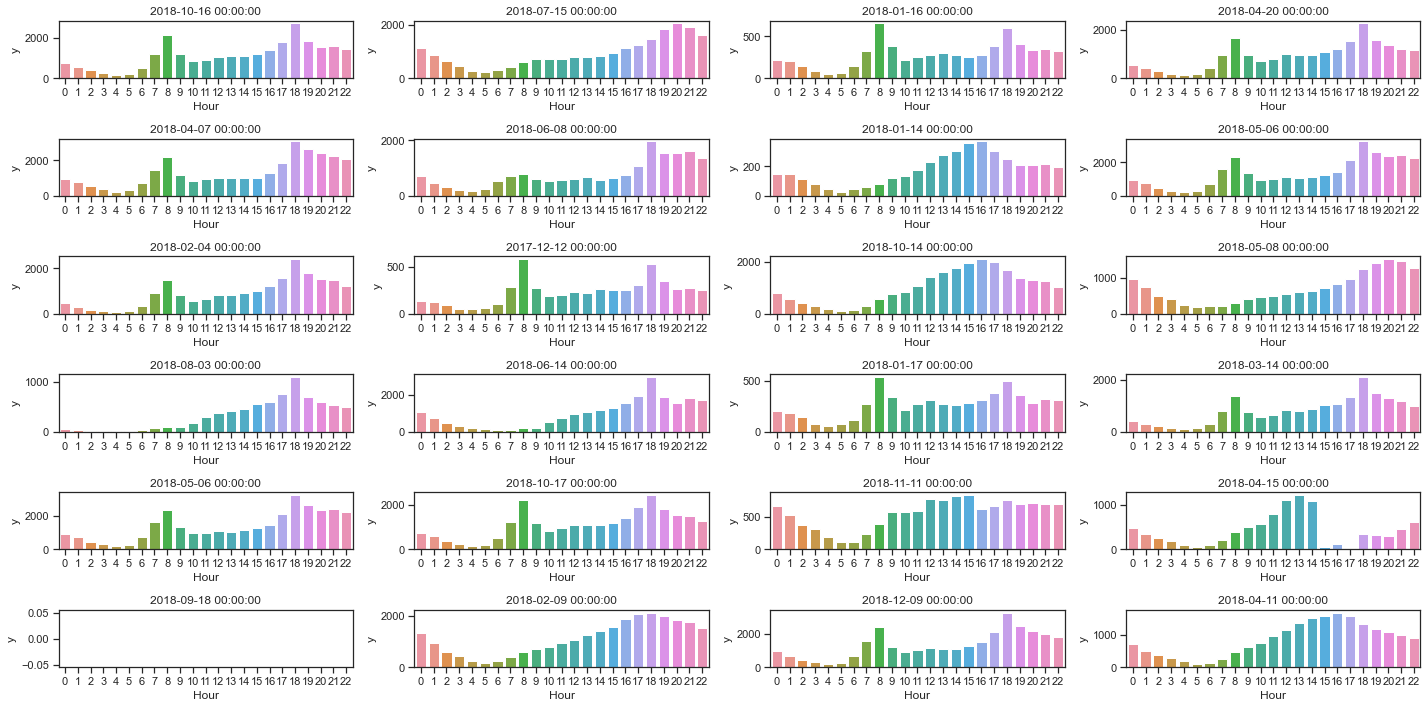

In [770]:
selection_set = [x for x in range(0,len(df),24)]
fig , axes = plt.subplots(6,4,figsize=(20,10))
for ax in axes.flatten():  
    i = np.random.choice(selection_set)
    sns.barplot(data=df.iloc[i:i+23,:],x='Hour',y='y',ax=ax)
    ax.set_title(str(df.loc[i,'Date']))
plt.tight_layout()
plt.show()  

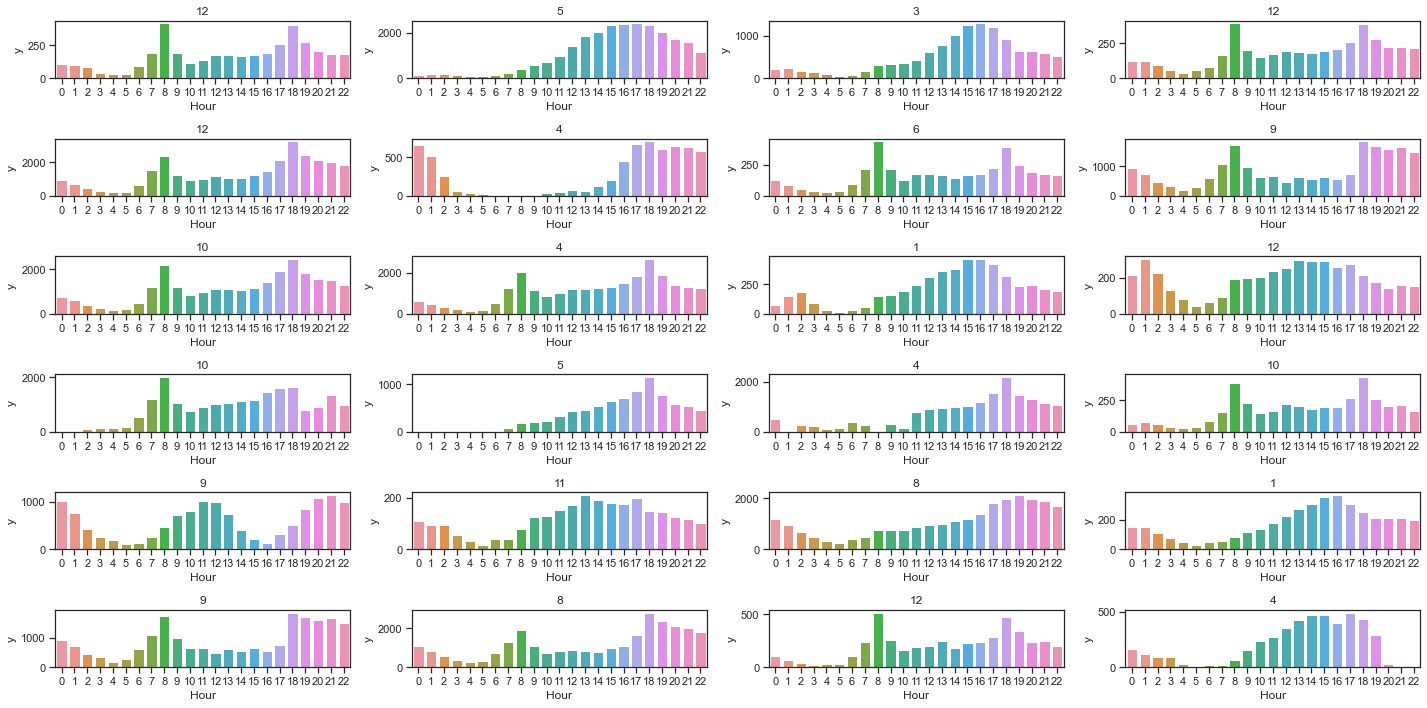

In [774]:
selection_set = [x for x in range(0,len(df),24)]
fig , axes = plt.subplots(6,4,figsize=(20,10))
for ax in axes.flatten():  
    i = np.random.choice(selection_set)
    sns.barplot(data=df.iloc[i:i+23,:],x='Hour',y='y',ax=ax)
    ax.set_title(str(df.loc[i,'Month']))
plt.tight_layout()
plt.show()

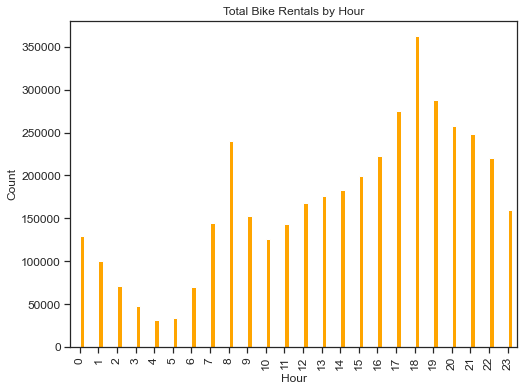

In [759]:
ax = df[['Hour','y']].groupby(['Hour']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [831]:
df['Increase_Hour'] = np.where((df.Hour >6),1,0 )
Rainfall_labels =["low", "median", "heigh"]
# df["Hour_cat"] = pd.cut(df["Hour"], [0,2,6,23], right = False, labels = Rainfall_labels)
# df["Hour_cat"] = pd.qcut(df["Hour"],q=3,duplicates='drop', labels = Rainfall_labels)
df["Hour_cat"] = pd.qcut(df["Hour"],q=[0,.125,.29,1],duplicates='drop', labels = Rainfall_labels)

df.groupby("Hour_cat").y.sum()

Hour_cat
low        301031
median     182551
heigh     3568485
Name: y, dtype: int64

In [832]:
# df["Hour_cat"] = df["Hour_cat"].astype('category')
# df["Hour_cat"] = df["Hour_cat"].cat.codes
df.Hour_cat.replace(['heigh','low','median'],[3,2,1],inplace=True)
df.Hour_cat.value_counts()

3    4080
1     960
2     720
Name: Hour_cat, dtype: int64

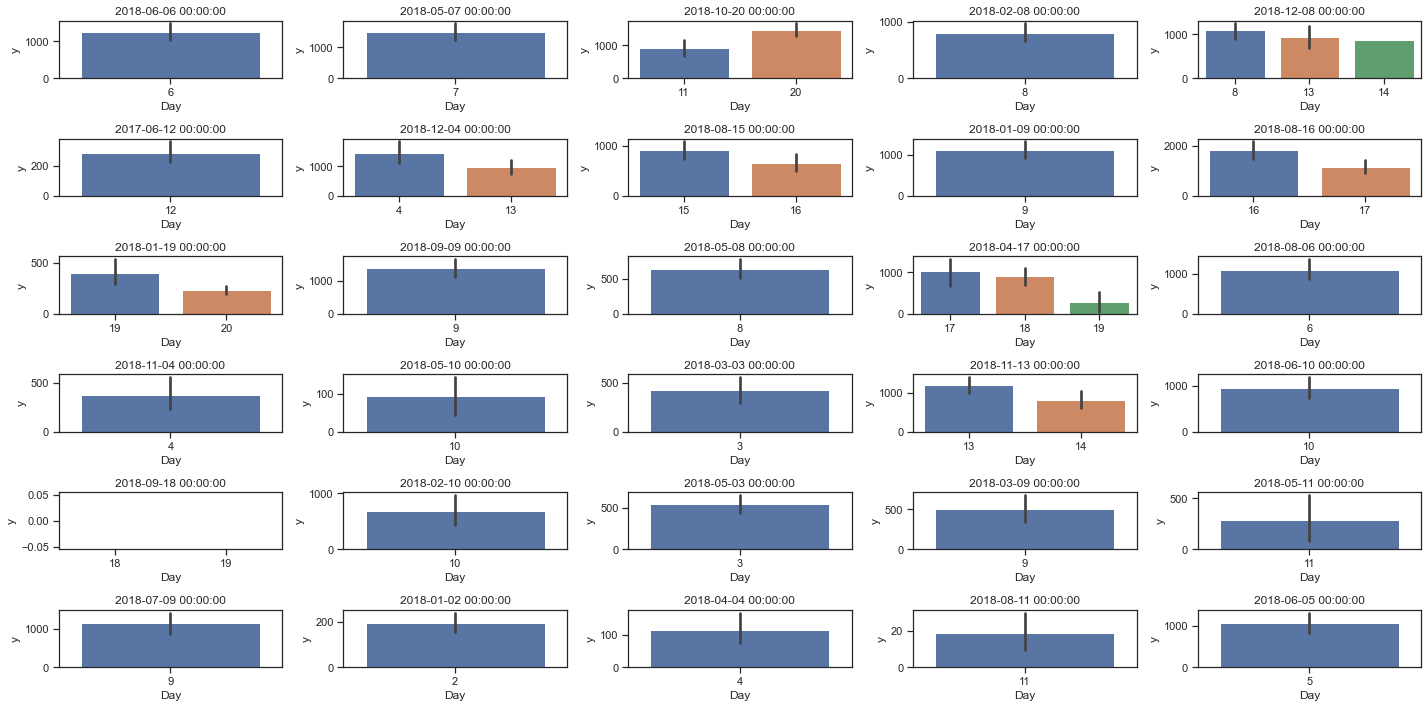

In [769]:
selection_set = [x for x in range(0,len(df),31)]
fig , axes = plt.subplots(6,5,figsize=(20,10))
for ax in axes.flatten():  
    i = np.random.choice(selection_set)
    sns.barplot(data=df.iloc[i:i+30,:],x='Day',y='y',ax=ax)
    ax.set_title(str(df.loc[i,'Date']))
plt.tight_layout()
plt.show()

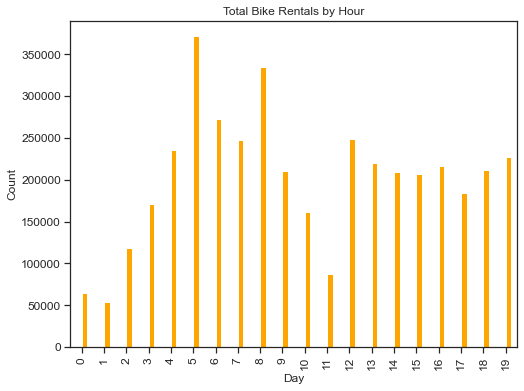

In [763]:
ax = df[['Day','y']].groupby(['Day']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [771]:
df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month',
       'Year', 'Day_of_Week', 'Day_of_Week_name', 'Week_of_year',
       'rental_per_Day', 'Day_not_rental', 'Increase_Hour'],
      dtype='object')

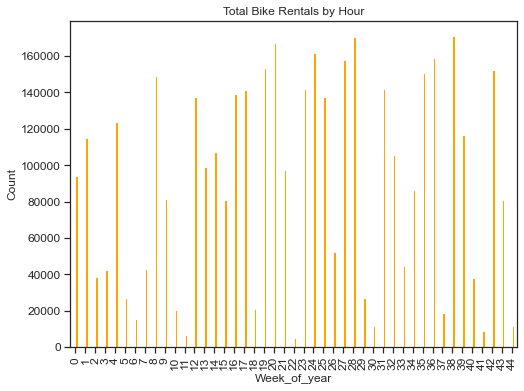

In [772]:
ax = df[['Week_of_year','y']].groupby(['Week_of_year']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Week_of_year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

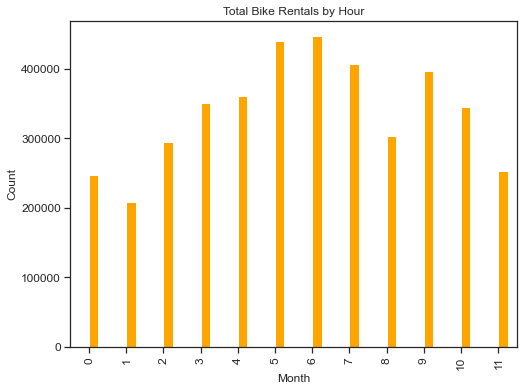

In [773]:
ax = df[['Month','y']].groupby(['Month']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

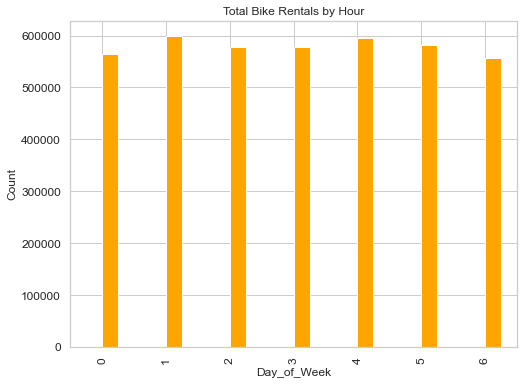

In [232]:
ax = df[['Day_of_Week','y']].groupby(['Day_of_Week']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Day_of_Week", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

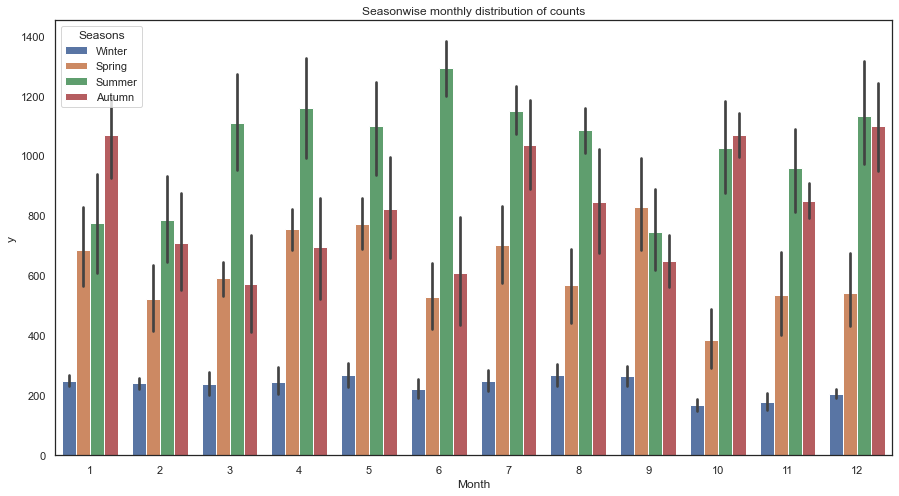

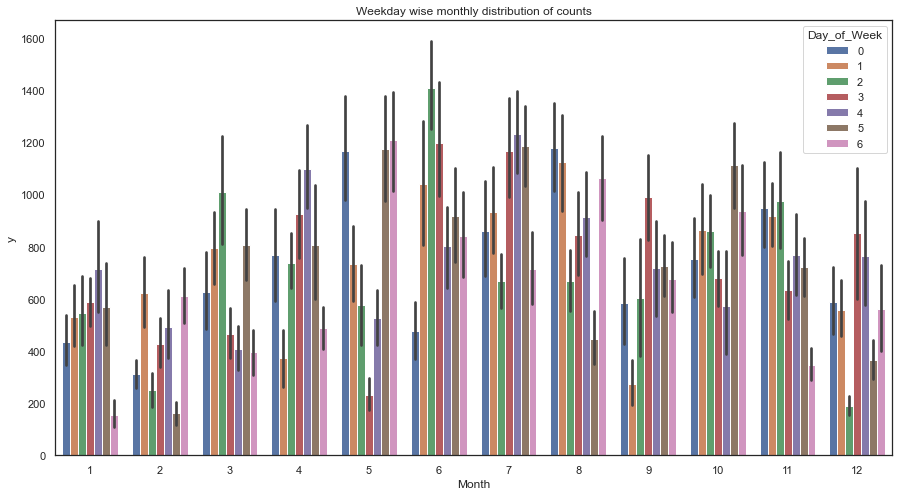

In [235]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='Month',y='y',data=df[['Month','y','Seasons']],hue='Seasons',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='y',data=df[['Month','y','Day_of_Week']],hue='Day_of_Week',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

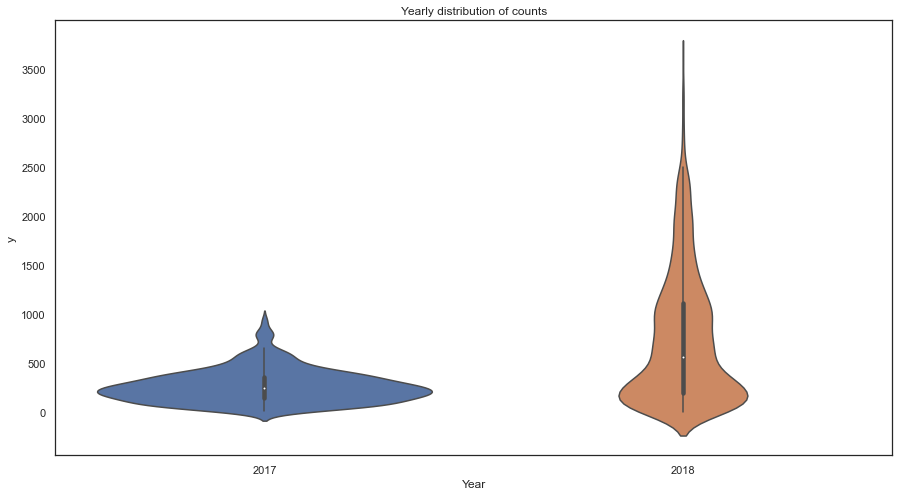

In [238]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='Year',y='y',data=df[['Year','y']])
ax.set_title('Yearly distribution of counts')
plt.show()

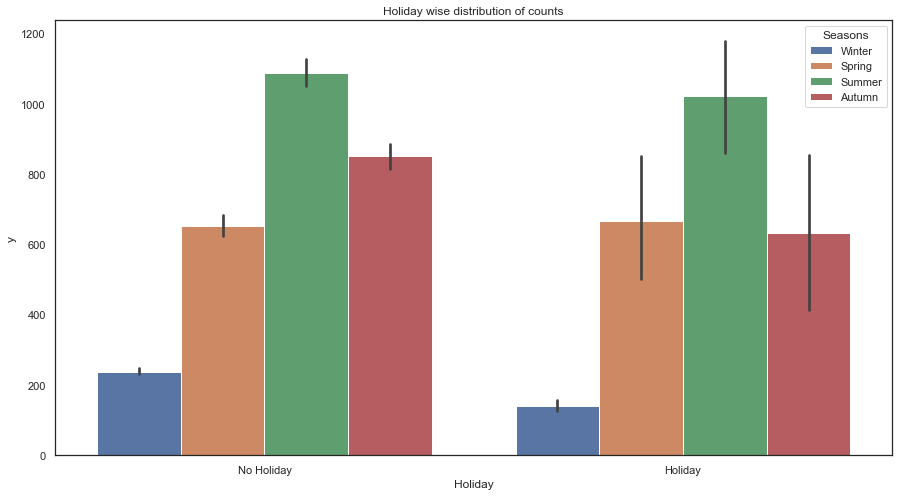

In [239]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='Holiday',y='y',hue='Seasons')
ax.set_title('Holiday wise distribution of counts')
plt.show()

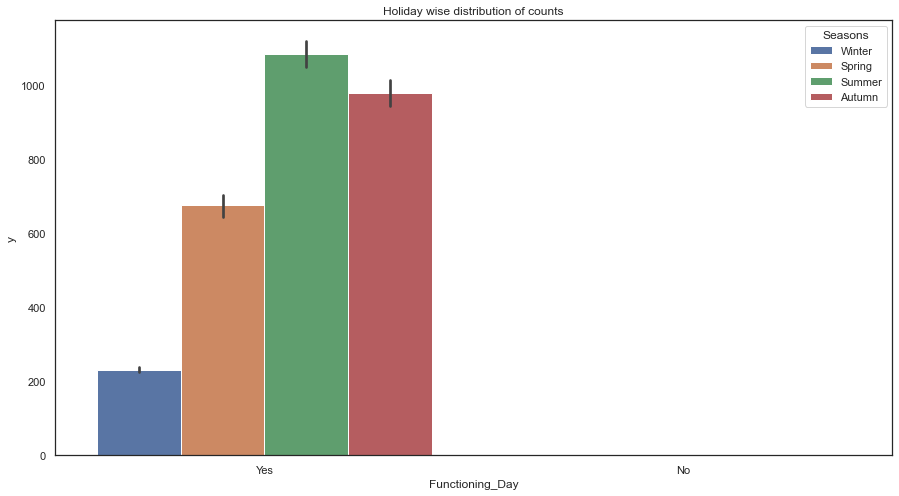

In [241]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='Functioning_Day',y='y',hue='Seasons')
ax.set_title('Holiday wise distribution of counts')
plt.show()

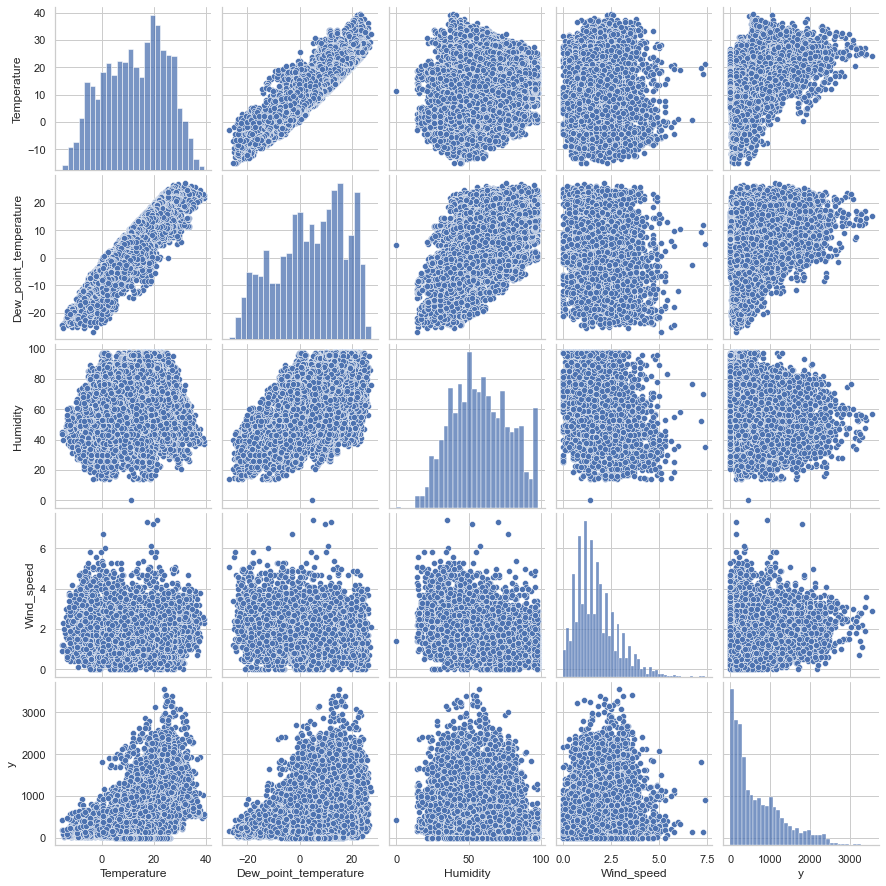

In [705]:
sns.pairplot(df[['Temperature','Dew_point_temperature','Humidity','Wind_speed','y']])
plt.show()

In [704]:
df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month',
       'Year', 'Day_of_Week', 'Day_of_Week_name', 'Week_of_year',
       'rental_per_Day', 'Snowfall_ap', 'Rainfall_cat', 'Snowfall_cat'],
      dtype='object')

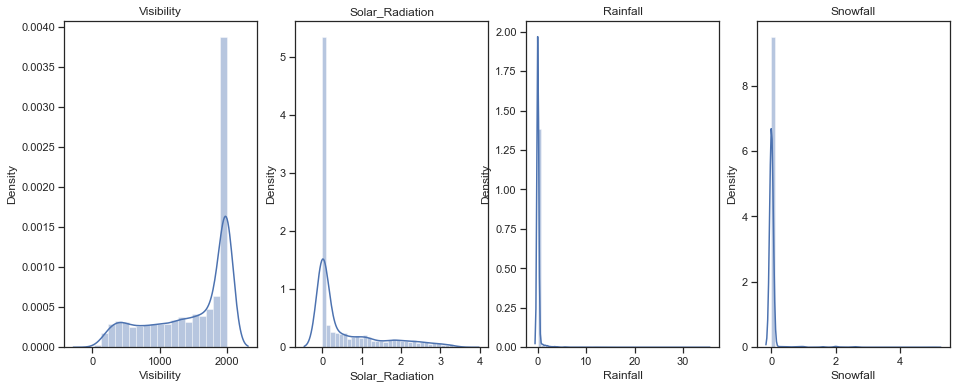

In [814]:
plt.figure(figsize=(20, 6))

features = ['Visibility', 'Solar_Radiation', 'Rainfall','Snowfall']

for i in enumerate(features):
    plt.subplot(1,5,i[0]+1)
    sns.distplot(df[i[1]])
    plt.title(i[1])
plt.show()

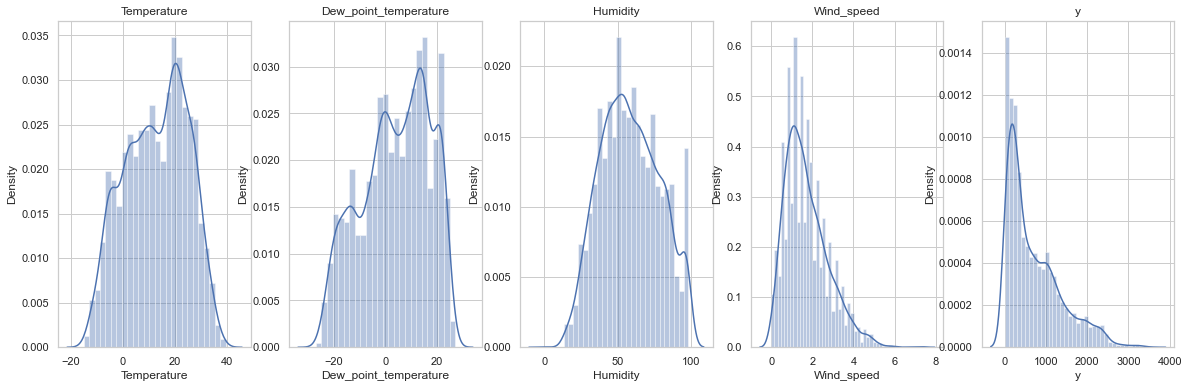

In [708]:
plt.figure(figsize=(20, 6))

features = ['Temperature','Dew_point_temperature','Humidity','Wind_speed','y']

for i in enumerate(features):
    plt.subplot(1,5,i[0]+1)
    sns.distplot(df[i[1]])
    plt.title(i[1])
plt.show()

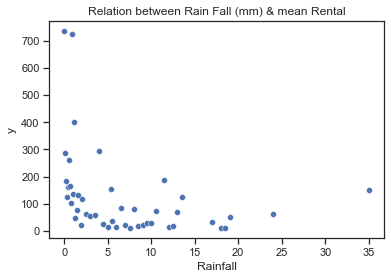

Rainfall_cat
[0, 10)     145.458385
[10, 21)     55.681818
[21, 36)    106.000000
Name: y, dtype: float64

In [834]:
rain_fall_rental = df.groupby(['Rainfall'],as_index=False)['y'].mean()
sns.scatterplot(data = rain_fall_rental,x='Rainfall',y='y')
plt.title("Relation between Rain Fall (mm) & mean Rental")
plt.show()

Rainfall_bins = [0, 10, 21, 36]
cats = pd.cut(rain_fall_rental.Rainfall, Rainfall_bins, right = False)
cats.value_counts()

rain_fall_rental["Rainfall_cat"] = cats
rain_fall_rental.head()

rain_fall_rental.groupby("Rainfall_cat").y.mean()

In [835]:
group_names = ["low", "median", "heigh"]
Rainfall_bins = [0, 20, 30, 36]
rain_fall_rental["Rainfall_cat"] = pd.cut(rain_fall_rental.Rainfall, Rainfall_bins, labels = group_names)
rain_fall_rental.head(10)

rain_fall_rental.groupby("Rainfall_cat").y.mean()

Rainfall_cat
low       107.869432
median     61.000000
heigh     151.000000
Name: y, dtype: float64

In [836]:
Rainfall_labels =["low", "median", "heigh"]

rain_fall_rental["Rainfall_cat"] =  pd.qcut(rain_fall_rental.Rainfall,
                                            [0, 0.2,0.3, 1], precision = 3, labels = Rainfall_labels) 

rain_fall_rental.groupby("Rainfall_cat").y.mean()


Rainfall_cat
low       304.862381
median    158.046762
heigh      62.747519
Name: y, dtype: float64

In [837]:
df["Rainfall_cat"] = pd.qcut(df["Rainfall"],q=35,duplicates='drop', labels = Rainfall_labels)

df.groupby("Rainfall_cat").y.mean()

Rainfall_cat
low       734.515402
median    209.936709
heigh      86.824324
Name: y, dtype: float64

In [838]:
df.Rainfall_cat.value_counts()

low       5454
median     158
heigh      148
Name: Rainfall_cat, dtype: int64

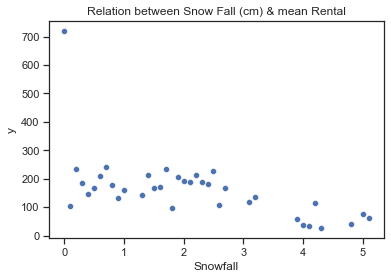

Snowfall       28
no_Snowfall     8
Name: Snowfall_ap, dtype: int64

In [839]:
snow_fall_rental = df.groupby(['Snowfall'],as_index=False)['y'].mean()
sns.scatterplot(data = snow_fall_rental,x='Snowfall',y='y')
plt.title("Relation between Snow Fall (cm) & mean Rental")
plt.show()

snow_fall_rental["Snowfall_ap"] = np.where(snow_fall_rental.Snowfall < 3.5, "Snowfall", "no_Snowfall")
snow_fall_rental.head()
snow_fall_rental.Snowfall_ap.value_counts()

In [840]:
df["Snowfall_ap"] = pd.Series(np.where(df.Snowfall < 3.5, "light", "heavy"))
df.Snowfall_ap.value_counts()

light    5749
heavy      11
Name: Snowfall_ap, dtype: int64

In [841]:
Rainfall_labels =["low", "median", "heigh"]

snow_fall_rental["Snowfall_cat"] =  pd.qcut(snow_fall_rental.Snowfall,
                                            [0, 0.5,0.8, 1], precision = 0, labels = Rainfall_labels) 

snow_fall_rental.groupby("Snowfall_cat").y.mean()

Snowfall_cat
low       205.934207
median    161.694766
heigh      55.714286
Name: y, dtype: float64

In [842]:
Rainfall_labels =["low", "median", "heigh"]

df["Snowfall_cat"] = pd.qcut(df["Snowfall"],q=65,duplicates='drop', labels = Rainfall_labels)

df.groupby("Snowfall_cat").y.mean()

Snowfall_cat
low       720.522573
median    178.355556
heigh     159.750000
Name: y, dtype: float64

In [843]:
df.Snowfall_cat.value_counts()

low       5582
median      90
heigh       88
Name: Snowfall_cat, dtype: int64

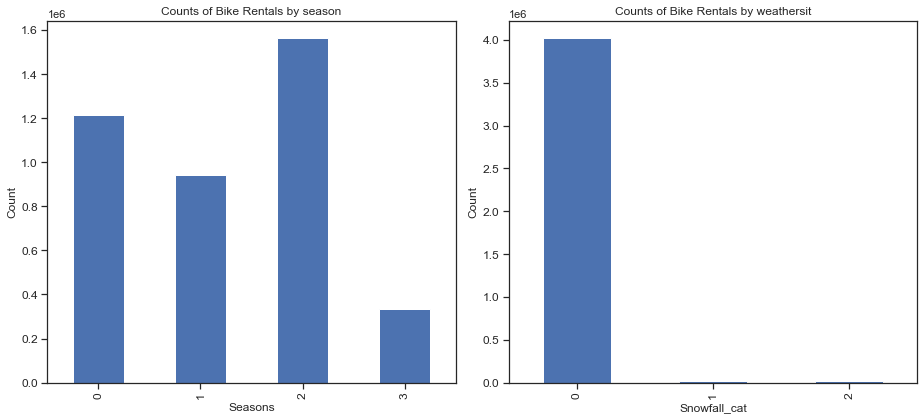

In [844]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = df[['Seasons','y']].groupby(['Seasons']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("Seasons", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
# ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = df[['Snowfall_cat','y']].groupby(['Snowfall_cat']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("Snowfall_cat", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
# ax2.set_xticklabels(['1: Clear','2: Light Snow','3: Heavy Rain'])

f.tight_layout()

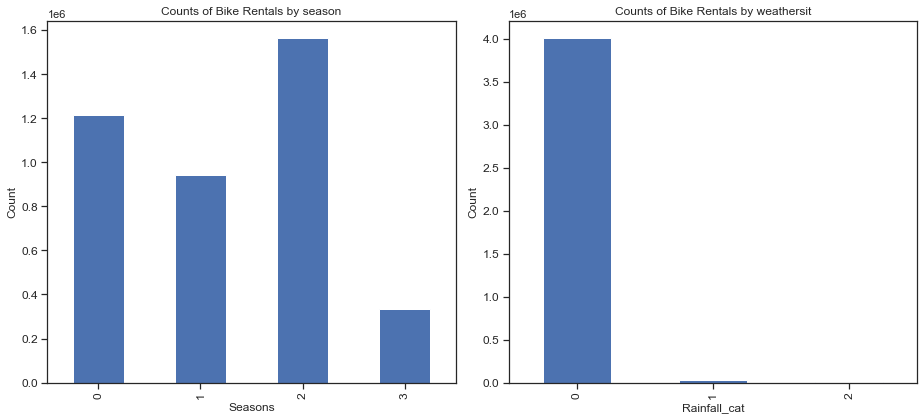

In [845]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = df[['Seasons','y']].groupby(['Seasons']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("Seasons", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
# ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = df[['Rainfall_cat','y']].groupby(['Rainfall_cat']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("Rainfall_cat", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
# ax2.set_xticklabels(['1: Clear','2: Light Snow','3: Heavy Rain'])

f.tight_layout()

In [846]:
season = pd.get_dummies(df['Seasons'], drop_first = True)
snowfall = pd.get_dummies(df['Snowfall_cat'],prefix='snow')
weekday = pd.get_dummies(df['Day_of_Week_name'], drop_first = True)
rainfall = pd.get_dummies(df['Rainfall_cat'],prefix='rain')

# Add the results to the original bike sharing dataframe
df = pd.concat([df, season,snowfall,weekday,rainfall], axis = 1)

# Drop the categorical variables as we have created the dummies for it
# df.drop(['Seasons','Snowfall_cat','Day_of_Week_name','Rainfall_cat'], axis = 1, inplace = True)
df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,...,snow_heigh,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,rain_low,rain_median,rain_heigh
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,0,0,0,0,1,0,0,1,0,0
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,0,0,0,0,1,0,0,1,0,0
2,2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,0,0,0,0,1,0,0,1,0,0
3,3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,0,0,0,0,1,0,0,1,0,0
4,4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

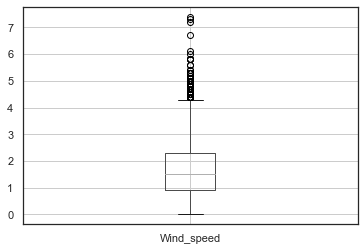

In [258]:
df.boxplot(column=['Wind_speed'])

Before Shape: (5760, 21)
After Shape: (5638, 21)


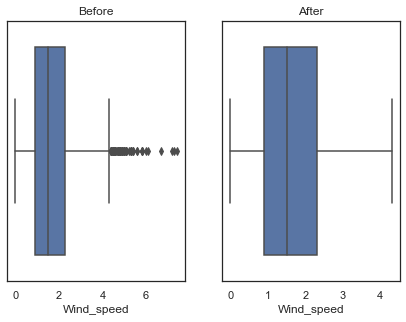

In [341]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Wind_speed']<4.4)]
print("After Shape:",df2.shape)

sns.boxplot(df['Wind_speed'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Wind_speed'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

<AxesSubplot:>

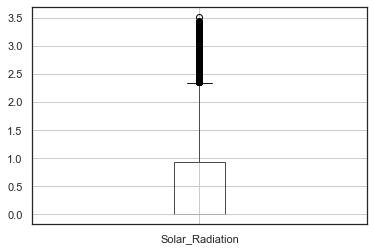

In [259]:
df.boxplot(column=['Solar_Radiation'])

Before Shape: (5760, 21)
After Shape: (2831, 21)


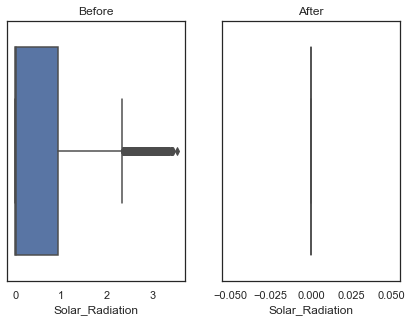

In [276]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Solar_Radiation']<.01)]
print("After Shape:",df2.shape)

sns.boxplot(df['Solar_Radiation'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Solar_Radiation'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

<AxesSubplot:>

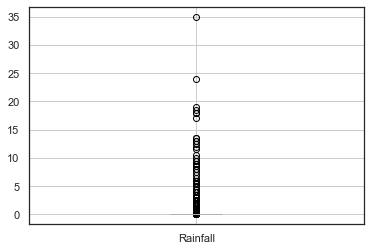

In [277]:
df.boxplot(column=['Rainfall'])

Before Shape: (5760, 21)
After Shape: (5428, 21)


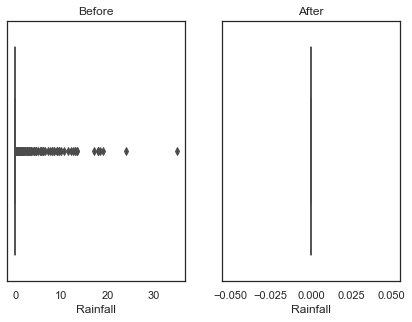

In [286]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Rainfall']<0.1)]
print("After Shape:",df2.shape)

sns.boxplot(df['Rainfall'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Rainfall'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

<AxesSubplot:>

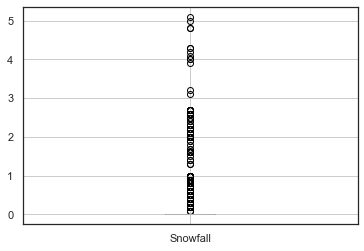

In [287]:
df.boxplot(column=['Snowfall'])

Before Shape: (5760, 21)
After Shape: (5580, 21)


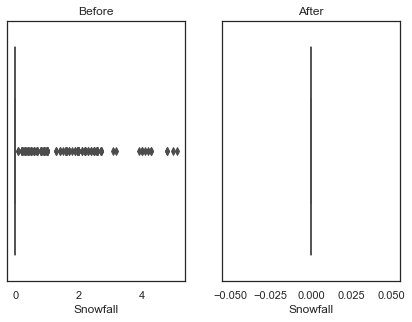

In [329]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Snowfall']<.1)]
print("After Shape:",df2.shape)

sns.boxplot(df['Snowfall'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Snowfall'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# # Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [305]:
df[['Wind_speed', 'Solar_Radiation', 'Rainfall','Snowfall']].describe().T

,count,mean,std,min,25%,50%,75%,max
Wind_speed,5760.0,1.723333,1.047898,0.0,0.9,1.50,2.30,7.40
Solar_Radiation,5760.0,0.572325,0.869943,0.0,0.0,0.01,0.94,3.52
Rainfall,5760.0,0.135122,1.075320,0.0,0.0,0.00,0.00,35.00
Snowfall,5760.0,0.046302,0.323728,0.0,0.0,0.00,0.00,5.10


In [447]:
wind_sol_rain_snow=pd.DataFrame(df,columns=['Wind_speed', 'Humidity', 'Rainfall'])
 #Cnames for outliers                     
cnames=['Wind_speed', 'Humidity', 'Rainfall']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_sol_rain_snow.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_sol_rain_snow.loc[wind_sol_rain_snow.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_sol_rain_snow.loc[wind_sol_rain_snow.loc[:,i]>max,:i]=np.nan  #Replace with NA

#Imputating the outliers by mean Imputation
wind_sol_rain_snow['Wind_speed']=wind_sol_rain_snow['Wind_speed'].fillna(wind_sol_rain_snow['Wind_speed'].median())
wind_sol_rain_snow['Rainfall']=wind_sol_rain_snow['Rainfall'].fillna(wind_sol_rain_snow['Rainfall'].median())

wind_sol_rain_snow["Wind_speed_ap"] = np.where(df.Wind_speed < 7, df.Wind_speed, df.Wind_speed.median())
wind_sol_rain_snow["Rainfall_ap"] = np.where(df.Rainfall < 20, df.Rainfall, df.Rainfall.median())
wind_sol_rain_snow["Humidity_ap"] = np.where(df.Humidity > 0, df.Humidity, df.Humidity.median())

In [448]:
wind_sol_rain_snow.describe().T

,count,mean,std,min,25%,50%,75%,max
Wind_speed,5760.0,1.658073,0.909700,0.0,1.0,1.5,2.2,4.3
Humidity,5760.0,56.364063,18.033865,0.0,43.0,56.0,69.0,98.0
Rainfall,5760.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Wind_speed_ap,5760.0,1.720313,1.040146,0.0,0.9,1.5,2.3,6.7
Rainfall_ap,5760.0,0.124878,0.919918,0.0,0.0,0.0,0.0,19.0
Humidity_ap,5760.0,58.371701,19.825262,14.0,43.0,57.0,73.0,98.0


In [449]:
df_without_outlier = df

In [450]:
df_without_outlier['Wind_speed']=wind_sol_rain_snow['Wind_speed']
df_without_outlier['Rainfall']=wind_sol_rain_snow['Rainfall']
df_without_outlier['Humidity_ap']=wind_sol_rain_snow['Humidity_ap']
df_without_outlier['Wind_speed_ap']=wind_sol_rain_snow['Wind_speed_ap']
df_without_outlier['Rainfall_ap']=wind_sol_rain_snow['Rainfall_ap']


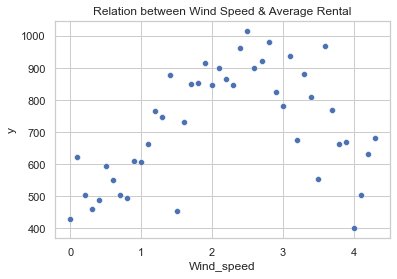

In [451]:
windspeed_rental = df.groupby('Wind_speed',as_index=False)['y'].mean()
sns.scatterplot(data = windspeed_rental,x='Wind_speed',y='y')
plt.title("Relation between Wind Speed & Average Rental")
plt.show()

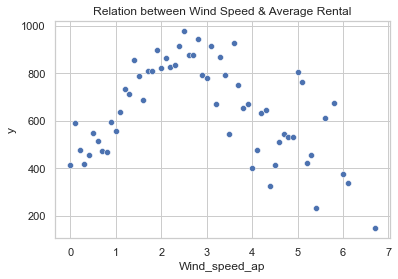

In [452]:
windspeed_rental = df_without_outlier.groupby('Wind_speed_ap',as_index=False)['y'].mean()
sns.scatterplot(data = windspeed_rental,x='Wind_speed_ap',y='y')
plt.title("Relation between Wind Speed & Average Rental")
plt.show()

In [ ]:
# df[(df['Functioning_Day']==0)]=0

Hypothesis of the test is that a feature is insignificant in the model and by having p-value less than 0.05, we reject this hypothesis and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we failed to reject the hypothesis that the feature is insignificant.

When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 10 and we can eliminate those variables.

Strategies:
When a feature has high p-value and high VIF, then it can be dropped first.

When a feature has high p-value and low VIF, then we will drop it as it is not significant.

When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we will remove this feature and build the model and check the R-squared.

When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.

Functions for building Linear regression model using statsmodels and calculate VIF using sklearn:
Iteratively we can drop the features one by one from the model using p-value and VIF and build the model using statsmodels

We will try to achieve a model not more than 10 variables and Rsquared is around 80 percent.

Following functions are created to call iteratively and build linear regression model using statsmodels and calculate VIF using sklearn and print statistics summary of each model.

In [20]:
X = df.drop(columns=['ID', 'Date', 'y','Day_of_Week', 'Day_of_Week_name'])
y = df['y']

In [22]:
regressor_ols = sm.OLS(endog =y, exog=X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              1419.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:11:46   Log-Likelihood:                         -43275.
No. Observations:                5760   AIC:                                  8.658e+04
Df Residuals:                    5745   BIC:                                  8.668e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Hour                     26.5429      0.932     28.476      0.000      24.716      28.370
Temperature              -0.3699      5.694     -0.065      0.948     -11.532      10.792
Humidity                -16.6014      1.645    -10.094      0.000     -19.826     -13.377
Wind_speed               10.5692      6.397      1.652      0.099      -1.971      23.109
Visibility                0.0275      0.013      2.119      0.034       0.002       0.053
Dew_point_temperature    34.6434      6.008      5.766      0.000      22.865      46.422
Solar_Radiation         -81.8601      9.623     -8.507      0.000    -100.725     -62.995
Rainfall                -50.8789      5.686     -8.949      0.000     -62.025     -39.733
Snowfall                -13.6210     19.180     -0.710      0.478     -51.220      23.978
Seasons                 -22.9662      6.475     -3.547      0.000     -35.660     -10.272
Holiday                 -73.3830     30.030     -2.444      0.015    -132.253     -14.513
Functioning_Day         801.7458     29.085     27.566      0.000     744.728     858.763
Day                       2.5574      1.075      2.378      0.017       0.449       4.666
Month                    13.0063      1.767      7.360      0.000       9.542      16.470
Year                      0.2025      0.077      2.625      0.009       0.051       0.354
==============================================================================
Omnibus:                      849.193   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.686
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       4.789   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_ = X[['Hour', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month', 'Year']]
regressor_ols = sm.OLS(endog =y, exog=X_).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              1520.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:14:57   Log-Likelihood:                         -43275.
No. Observations:                5760   AIC:                                  8.658e+04
Df Residuals:                    5746   BIC:                                  8.667e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Hour                     26.5394      0.930     28.522      0.000      24.715      28.364
Humidity                -16.5019      0.599    -27.546      0.000     -17.676     -15.328
Wind_speed               10.5747      6.396      1.653      0.098      -1.963      23.113
Visibility                0.0276      0.013      2.140      0.032       0.002       0.053
Dew_point_temperature    34.2561      0.759     45.161      0.000      32.769      35.743
Solar_Radiation         -82.0086      9.347     -8.774      0.000    -100.332     -63.685
Rainfall                -50.9342      5.621     -9.061      0.000     -61.954     -39.915
Snowfall                -13.6914     19.147     -0.715      0.475     -51.227      23.845
Seasons                 -22.8895      6.366     -3.595      0.000     -35.370     -10.409
Holiday                 -73.4395     30.015     -2.447      0.014    -132.280     -14.599
Functioning_Day         801.7496     29.082     27.568      0.000     744.737     858.762
Day                       2.5530      1.073      2.379      0.017       0.449       4.657
Month                    13.0126      1.764      7.376      0.000       9.554      16.471
Year                      0.1980      0.032      6.102      0.000       0.134       0.262
==============================================================================
Omnibus:                      849.260   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.964
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       4.789   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_ = X[['Hour', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month']]
regressor_ols = sm.OLS(endog =y, exog=X_).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1759.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:17:17   Log-Likelihood:                         -43295.
No. Observations:                5760   AIC:                                  8.661e+04
Df Residuals:                    5748   BIC:                                  8.669e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Hour                     28.2920      0.888     31.851      0.000      26.551      30.033
Humidity                -13.6941      0.377    -36.301      0.000     -14.434     -12.955
Wind_speed               16.6750      6.341      2.630      0.009       4.245      29.105
Visibility                0.0758      0.010      7.273      0.000       0.055       0.096
Dew_point_temperature    32.5802      0.696     46.799      0.000      31.215      33.945
Solar_Radiation         -55.3599      8.280     -6.686      0.000     -71.591     -39.129
Rainfall                -53.2408      5.625     -9.465      0.000     -64.268     -42.213
Seasons                 -17.3160      6.277     -2.759      0.006     -29.621      -5.011
Holiday                 -54.9543     29.971     -1.834      0.067    -113.709       3.800
Functioning_Day         883.8694     26.007     33.986      0.000     832.886     934.853
Day                       4.3850      1.024      4.281      0.000       2.377       6.393
Month                    14.4241      1.732      8.328      0.000      11.029      17.819
==============================================================================
Omnibus:                      831.444   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1544.842
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       4.751   Cond. No.                     8.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df.Temperature.describe()

count    5760.000000
mean       12.803559
std        11.902206
min       -15.100000
25%         3.200000
50%        13.700000
75%        22.225000
max        39.400000
Name: Temperature, dtype: float64

In [13]:
df.groupby('Functioning_Day')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
Functioning_Day,,,,,,,,
0,247.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,5513.0,735.002177,652.243422,2.0,215.0,532.0,1094.0,3556.0


<AxesSubplot:title={'center':'y'}, xlabel='Functioning_Day'>

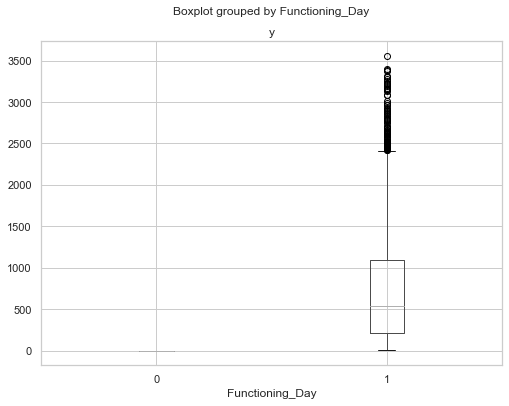

In [14]:
df.boxplot(column=['y'],by='Functioning_Day',figsize=(8,6))

In [15]:
sample_01 = df[(df['Functioning_Day'] ==1)]

sample_02 = df[(df['Functioning_Day'] ==0)]

In [16]:
sample_01.shape,sample_02.shape

((5513, 20), (247, 20))

In [17]:
sample_01 = sample_01.sample(247)
sample_01.shape,sample_02.shape

((247, 20), (247, 20))

pvalue her is less than .5% is the threshold her then we accept the   alternative and reject null hypothesis

In [18]:
stats.levene(sample_01['y'],sample_02['y'])

LeveneResult(statistic=330.309924886673, pvalue=7.536477146260874e-57)

In [19]:
from sklearn.preprocessing import scale

(array([80., 47., 40., 34., 13., 19.,  6.,  5.,  0.,  3.]),
 array([-1.1627064 , -0.67180787, -0.18090935,  0.30998918,  0.8008877 ,
         1.29178623,  1.78268475,  2.27358328,  2.76448181,  3.25538033,
         3.74627886]),
 <BarContainer object of 10 artists>)

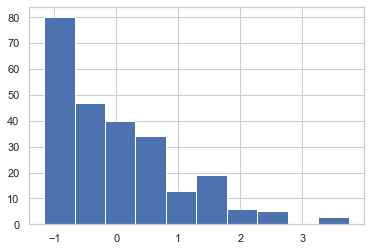

In [20]:
diff = scale(np.array(sample_01['y']) - np.array(sample_02['y'],dtype=np.float))
plt.hist(diff)

qqplot check how the distribution of the resdual compaire aganist normal distribution

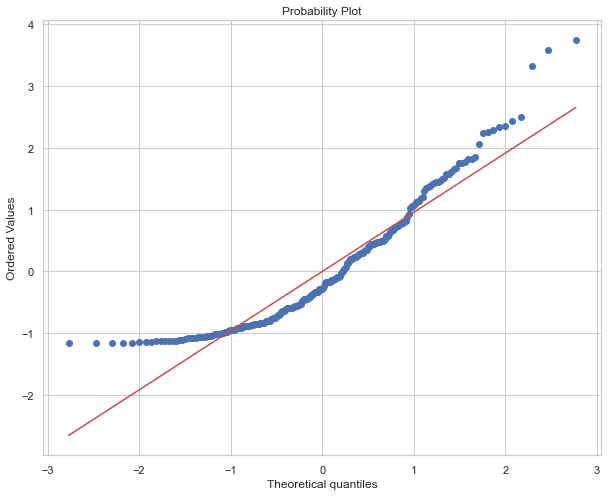

In [21]:
plt.figure(figsize=(10,8))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

shapiro-wilk test for normality - if the test statistic is not significant then population is normally distributed

this means that the shapiro is significant and the residual data is not normally distributed

In [22]:
stats.shapiro(diff)

(0.9007161259651184, 1.0643569359203298e-11)

independent t_test on two samples 
then we reject the null hypothesis

In [23]:
stats.ttest_ind(sample_01['y'],sample_02['y'])

Ttest_indResult(statistic=18.402222456205095, pvalue=6.265148726439116e-58)

we can say that dependent on test that there are difference effect between two groups on number of bike rental 

In [24]:
import researchpy as rp

In [25]:
descriptives ,results = rp.ttest(sample_01['y'],sample_02['y'])

In [26]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,y,247.0,776.534413,663.191432,42.197860,693.419221,859.649605
1,y,247.0,0.000000,0.000000,0.000000,NaN,NaN
2,combined,494.0,388.267206,608.705658,27.386962,334.457645,442.076768


In [27]:
print(results)

          Independent t-test   results
0      Difference (y - y) =   776.5344
1      Degrees of freedom =   492.0000
2                       t =    18.4022
3   Two side test p value =     0.0000
4  Difference < 0 p value =     1.0000
5  Difference > 0 p value =     0.0000
6               Cohen's d =     1.6559
7               Hedge's g =     1.6534
8           Glass's delta =     1.1709
9             Pearson's r =     0.6385


# --------------------------------

<AxesSubplot:>

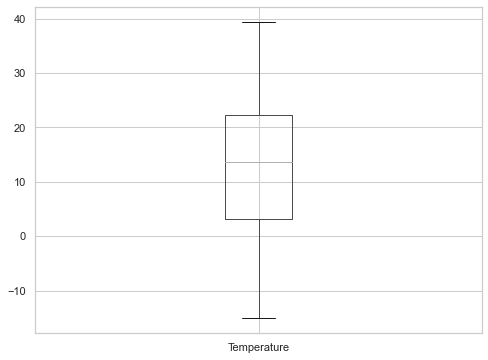

In [28]:
df[['Temperature']].boxplot(figsize=(8,6))

In [29]:
df['Temp_cat'] = df['Temperature'] > df['Temperature'].mean()

In [30]:
df.groupby('Temp_cat')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
Temp_cat,,,,,,,,
False,2775.0,369.209369,362.998981,0.0,132.0,257.0,480.5,2514.0
True,2985.0,1014.241541,711.070310,0.0,431.0,964.0,1458.0,3556.0


very different median and distribution 
is this diff significant we will discover it 

<AxesSubplot:title={'center':'y'}, xlabel='Temp_cat'>

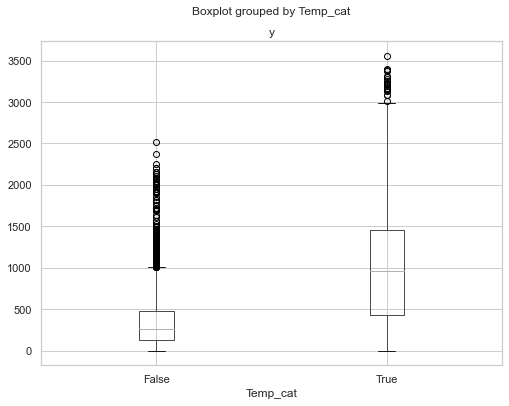

In [31]:
df.boxplot(column=['y'],by='Temp_cat',figsize=(8,6))

In [32]:
sample_01 = df[(df['Temp_cat'] ==True)] # above the mean hot

sample_02 = df[(df['Temp_cat'] ==False)] # bellow the mean cooler

In [33]:
sample_01.shape ,sample_02.shape

((2985, 21), (2775, 21))

In [34]:
sample_01 = sample_01.sample(2775)
sample_01.shape ,sample_02.shape

((2775, 21), (2775, 21))

independent ttest we will see the significant difference between the variance between two sample 

pvalue her is less than .5% is the threshold her then we accept the   alternative and reject null hypothesis this means that the variance between two sample are diff

In [35]:
stats.levene(sample_01['y'],sample_02['y'])

LeveneResult(statistic=1125.1306645698496, pvalue=9.123458001610053e-225)

(array([  5.,  36., 131., 526., 692., 715., 364., 242.,  49.,  15.]),
 array([-3.48011488, -2.79196557, -2.10381627, -1.41566696, -0.72751766,
        -0.03936835,  0.64878096,  1.33693026,  2.02507957,  2.71322887,
         3.40137818]),
 <BarContainer object of 10 artists>)

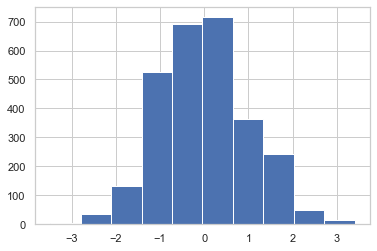

In [36]:
diff = scale(np.array(sample_01['y']) - np.array(sample_02['y'],dtype=np.float))
plt.hist(diff)

check the distribution 
is normal or not 
# this is normal

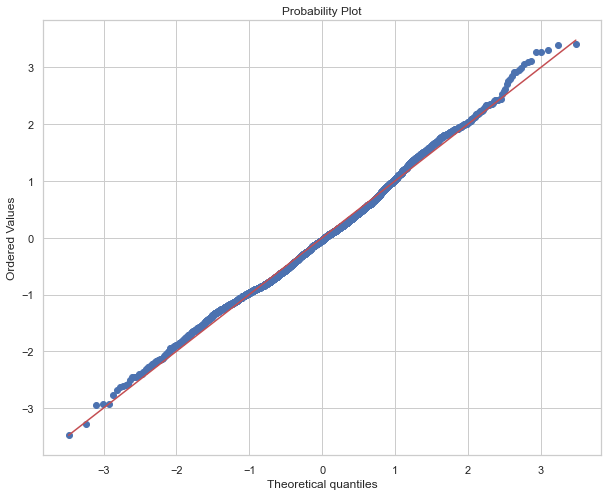

In [37]:
plt.figure(figsize=(10,8))
stats.probplot(diff,plot=plt)
plt.show()

In [38]:
stats.shapiro(diff) # accept the alternative hypothesis because pvalue is less than .5% the residual are not normal distributed

(0.9951326847076416, 6.575845645784284e-08)

the count of bike rental in hotday vs. coolerday are very significantly different

In [39]:
stats.ttest_ind(sample_01['y'],sample_02['y'])

Ttest_indResult(statistic=42.577881070511175, pvalue=0.0)

In [40]:
descriptives ,results = rp.ttest(sample_01['y'],sample_02['y'],equal_variances=False)

In [41]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,y,2775.0,1014.411171,710.947828,13.496036,987.947880,1040.874463
1,y,2775.0,369.209369,362.998981,6.890868,355.697621,382.721117
2,combined,5550.0,691.810270,650.107850,8.726476,674.702959,708.917581


In [42]:
print(results)

              Welch's t-test    results
0      Difference (y - y) =    645.2018
1      Degrees of freedom =   4129.2790
2                       t =     42.5779
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.1431
7               Hedge's g =      1.1429
8           Glass's delta =      0.9075
9             Pearson's r =      0.5523


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.0,1439.75,2879.50,4319.250,5759.00
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature,5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity,5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind_speed,5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility,5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew_point_temperature,5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar_Radiation,5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall,5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00


<AxesSubplot:>

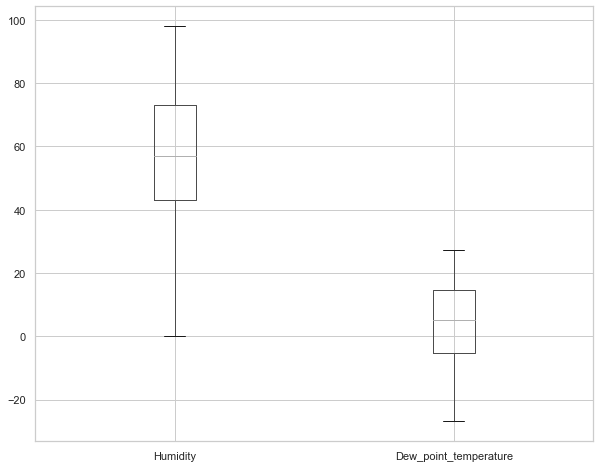

In [44]:
df[['Humidity','Dew_point_temperature']].boxplot(figsize=(10,8))

In [45]:
stats.levene(df['Humidity'],df['Dew_point_temperature'])

LeveneResult(statistic=1031.4306535785995, pvalue=8.095349591369249e-217)

In [46]:
df['hd_diff'] = scale(df.Humidity - df.Dew_point_temperature)

In [47]:
df.hd_diff.head()

0    0.017637
1    0.077130
2    0.142572
3    0.196115
4    0.017637
Name: hd_diff, dtype: float64

<AxesSubplot:>

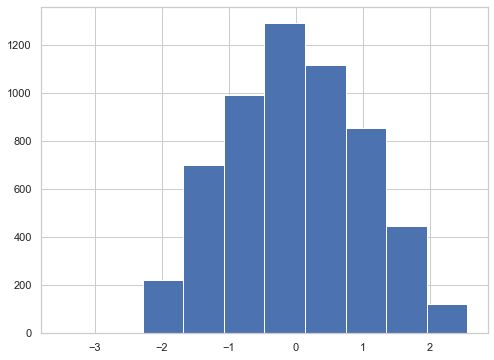

In [48]:
df.hd_diff.hist(figsize=(8,6))

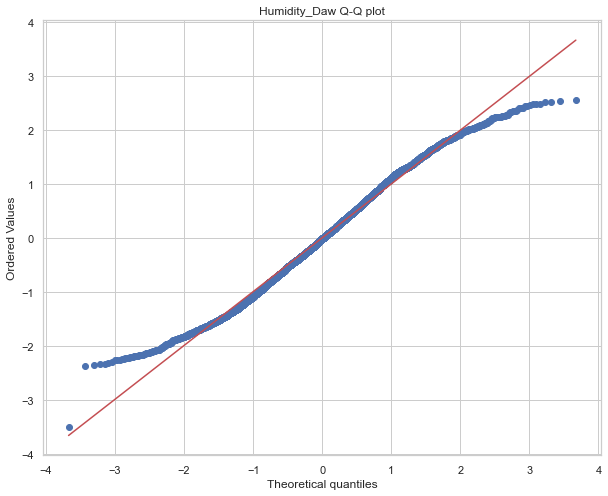

In [49]:
plt.figure(figsize=(10,8))
stats.probplot(df.hd_diff,plot=plt)

plt.title('Humidity_Daw Q-Q plot')
plt.show()

In [50]:
stats.shapiro(df.hd_diff) # accept the alternative hypothesis because pvalue is less than .5% the residual are not normal distributed

(0.9912312626838684, 1.984854414611564e-18)

In [51]:
stats.ttest_rel(df.Humidity,df.Dew_point_temperature)

Ttest_relResult(statistic=245.16925728139034, pvalue=0.0)

In [52]:
rp.ttest(df.Humidity,df.Dew_point_temperature,paired = True,equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for Humidity =,58.361806
1,Mean for Dew_point_temperature =,4.058264
2,W value =,1.000000
3,Z value =,-5561.479800
4,Two sided p value =,0.000000
5,r =,-51.816000


In [53]:
from statsmodels.formula.api import ols

In [54]:
df.groupby('Seasons')['y'].describe().T

Seasons,1,2,3,4
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,652.969444,1085.705556,843.493056,231.767361
std,588.141127,702.055219,682.937902,148.564049
min,0.000000,9.000000,0.000000,9.000000
25%,164.750000,562.750000,218.750000,120.000000
50%,505.000000,962.000000,811.500000,212.000000
75%,997.500000,1518.750000,1238.250000,310.000000
max,3130.000000,3556.000000,3298.000000,937.000000


<AxesSubplot:title={'center':'y'}, xlabel='Seasons'>

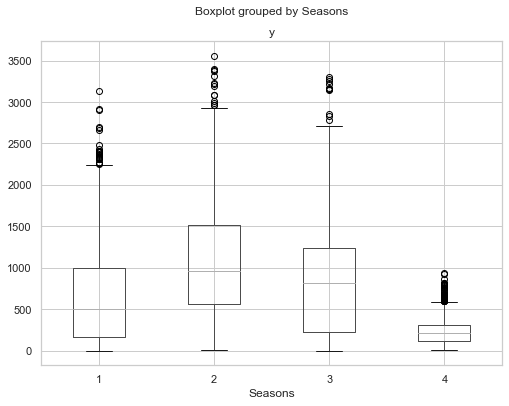

In [55]:
df.boxplot(column=['y'],by='Seasons',figsize=(8,6))

the diff in the mean between this four cat are significant

In [56]:
stats.f_oneway(df['y'][df['Seasons'] == 1],df['y'][df['Seasons'] == 2],
              df['y'][df['Seasons'] == 3],df['y'][df['Seasons'] == 4])

F_onewayResult(statistic=565.2722515478746, pvalue=5.24e-322)

We reject null hypothesis

In [57]:
from statsmodels.stats.multicomp import MultiComparison
mul_com = MultiComparison(df['y'],df['Seasons'])

mul_result = mul_com.tukeyhsd()
print(mul_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     1      2  432.7361 0.001  377.5693  487.9029   True
     1      3  190.5236 0.001  135.3568  245.6904   True
     1      4 -421.2021 0.001 -476.3689 -366.0353   True
     2      3 -242.2125 0.001 -297.3793 -187.0457   True
     2      4 -853.9382 0.001  -909.105 -798.7714   True
     3      4 -611.7257 0.001 -666.8925 -556.5589   True
--------------------------------------------------------


# ------------------------------------

In [58]:
rp.summary_cont(df.groupby(['Holiday']))['y']

,N,Mean,SD,SE,95% Conf.,Interval
Holiday,,,,,,
0,5520,711.4525,655.7672,8.8263,694.1495,728.7556
1,240,520.2042,616.6666,39.8057,441.7894,598.6189


<AxesSubplot:title={'center':'y'}, xlabel='Holiday'>

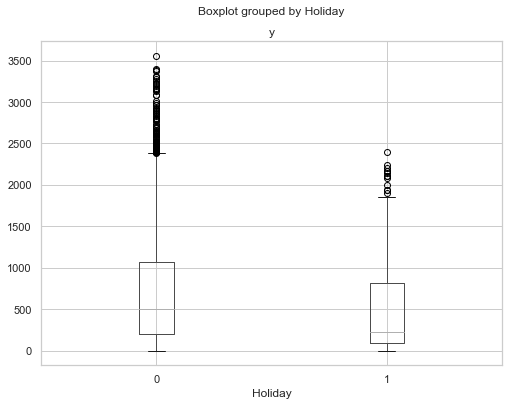

In [59]:
df.boxplot(column=['y'], by='Holiday', figsize=(8,6))

In [60]:
rp.summary_cont(df.groupby(['Seasons']))['y']

,N,Mean,SD,SE,95% Conf.,Interval
Seasons,,,,,,
1,1440,652.9694,588.1411,15.4989,622.5666,683.3723
2,1440,1085.7056,702.0552,18.5008,1049.4142,1121.9969
3,1440,843.4931,682.9379,17.9970,808.1899,878.7962
4,1440,231.7674,148.5640,3.9150,224.0876,239.4471


<AxesSubplot:title={'center':'y'}, xlabel='Seasons'>

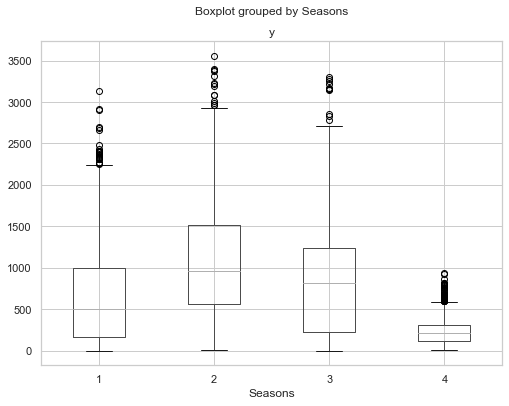

In [61]:
df.boxplot(column=['y'], by='Seasons', figsize=(8,6))

In [62]:
model = ols('y ~ C(Seasons)',df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     565.3
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          5.24e-322
Time:                        17:20:51   Log-Likelihood:                -44783.
No. Observations:                5760   AIC:                         8.957e+04
Df Residuals:                    5756   BIC:                         8.960e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         652.9694     15.180     

In [63]:
model = ols('y ~ C(Holiday)',df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     19.66
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           9.44e-06
Time:                        17:20:52   Log-Likelihood:                -45516.
No. Observations:                5760   AIC:                         9.104e+04
Df Residuals:                    5758   BIC:                         9.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         711.4525      8.805     

In [64]:
model = ols('y ~ C(Holiday) + C(Seasons)',df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     425.8
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          6.72e-322
Time:                        17:20:53   Log-Likelihood:                -44780.
No. Observations:                5760   AIC:                         8.957e+04
Df Residuals:                    5755   BIC:                         8.960e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         656.0791     15.226     

In [65]:
import statsmodels.api as sm
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Holiday),1.0,8.412466e+06,8.412466e+06,25.374798,4.864479e-07
C(Seasons),3.0,5.562792e+08,1.854264e+08,559.307719,5.341245e-319
Residual,5755.0,1.907946e+09,3.315284e+05,NaN,NaN


In [66]:
model = ols('y ~ C(Holiday) * C(Seasons)',df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          7.25e-319
Time:                        17:20:54   Log-Likelihood:                -44778.
No. Observations:                5760   AIC:                         8.957e+04
Df Residuals:                    5752   BIC:                         8.962e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [67]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Holiday),1.0,8.412466e+06,8.412466e+06,25.378730,4.854692e-07
C(Seasons),3.0,5.562792e+08,1.854264e+08,559.394399,5.053007e-319
C(Holiday):C(Seasons),3.0,1.290072e+06,4.300240e+05,1.297296,2.734872e-01
Residual,5752.0,1.906656e+09,3.314770e+05,NaN,NaN


# ----------------------------------

Numerical measure of a statistical relationship between two variables ranges between -1 to 1

correlation between feature and target

In [74]:
from yellowbrick.target import FeatureCorrelation

In [80]:
target = df['y']

features = df.drop(['ID', 'Date', 'y', 'Day_of_Week', 'Day_of_Week_name'],axis=1)

In [81]:
feature_names = list(features.columns)

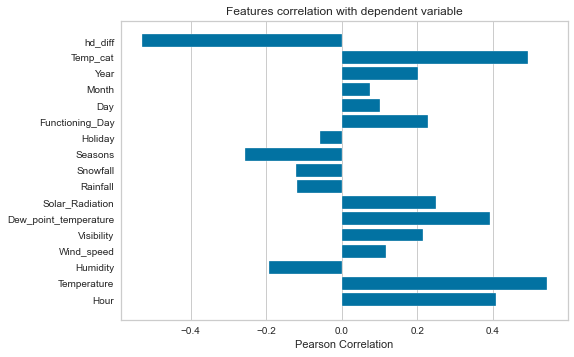

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [83]:
visualizer = FeatureCorrelation(labels=feature_names)

visualizer.fit(features,target)

visualizer.poof()

In [84]:
from sklearn.feature_selection import SelectKBest,f_regression,\
mutual_info_regression

In [85]:
select_univariate = SelectKBest(f_regression,k=5).fit(features,target)

In [86]:
features_mask = select_univariate.get_support()

features_mask

array([ True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True])

In [87]:
selected_columns = features.columns[features_mask]
selected_columns

Index(['Hour', 'Temperature', 'Dew_point_temperature', 'Temp_cat', 'hd_diff'], dtype='object')

In [88]:
selected_features = features[selected_columns]

selected_features.head()

,Hour,Temperature,Dew_point_temperature,Temp_cat,hd_diff
0,0,-5.2,-17.6,False,0.017637
1,1,-5.5,-17.6,False,0.077130
2,2,-6.0,-17.7,False,0.142572
3,3,-6.2,-17.6,False,0.196115
4,4,-6.0,-18.6,False,0.017637


In [89]:
selected_features.describe()

,Hour,Temperature,Dew_point_temperature,hd_diff
count,5760.000000,5760.000000,5760.000000,5.760000e+03
mean,11.500000,12.803559,4.058264,-4.602800e-17
std,6.922788,11.902206,13.003582,1.000087e+00
min,0.000000,-15.100000,-26.900000,-3.498387e+00
25%,5.750000,3.200000,-5.400000,-7.319720e-01
50%,11.500000,13.700000,5.200000,-1.805854e-02
75%,17.250000,22.225000,14.700000,7.330379e-01
max,23.000000,39.400000,27.200000,2.557979e+00


In [90]:
X = pd.DataFrame(data=scale(selected_features),columns=selected_features.columns)
y = target

In [91]:
X.describe()

,Hour,Temperature,Dew_point_temperature,Temp_cat,hd_diff
count,5.760000e+03,5.760000e+03,5.760000e+03,5.760000e+03,5.760000e+03
mean,2.312965e-19,1.879477e-16,-3.336644e-16,1.223635e-15,1.946745e-17
std,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00
min,-1.661325e+00,-2.344606e+00,-2.380956e+00,-1.037148e+00,-3.498387e+00
25%,-8.306624e-01,-8.069422e-01,-7.274215e-01,-1.037148e+00,-7.319720e-01
50%,0.000000e+00,7.532375e-02,8.780928e-02,9.641827e-01,-1.805854e-02
75%,8.306624e-01,7.916397e-01,8.184406e-01,9.641827e-01,7.330379e-01
max,1.661325e+00,2.234775e+00,1.779798e+00,9.641827e-01,2.557979e+00


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [93]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred = LR.predict(X_test)

In [95]:
r2_score(y_test,y_pred)

0.45839238019317774

In [ ]:
X_train = sm.add_constant(X_train)

In [96]:
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_train)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.211
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              246.3
Date:                Sat, 21 Aug 2021   Prob (F-statistic):                   8.11e-234
Time:                        19:46:40   Log-Likelihood:                         -37593.
No. Observations:                4608   AIC:                                  7.520e+04
Df Residuals:                    4603   BIC:                                  7.523e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [217]:
df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month',
       'Year', 'Day_of_Week', 'Day_of_Week_name', 'Week_of_year'],
      dtype='object')

In [6]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')

# enc.fit(df[['Seasons']])
# colnames = enc.get_feature_names()
# enc_df = pd.DataFrame(enc.transform(df[['Seasons']]).toarray(),columns=colnames)

# df = df.join(enc_df)

# df.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)

# df.Holiday.replace(to_replace=["Holiday","No Holiday"], value =[0,1], inplace = True)


In [7]:
# df[(df['Functioning_Day']==0)&(df['x0_Autumn']==1)]

In [8]:
# D =['Temperature', 'Humidity', 'Wind_speed','Year','Day','Month', 'Hour',
#        'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
#        'Snowfall', 'Holiday', 'Functioning_Day', 'x0_Autumn', 'x0_Spring', 'x0_Summer', 'x0_Winter']
# df.loc[( df['Functioning_Day']==0) & ((df['x0_Autumn']==1 ) | (df['x0_Spring']==1)  ),D]=0

In [9]:
# df["Wind_speed_ap"] = pd.Series(np.where(df.Wind_speed < 2.7, "Wind_increase", "Wind_decrease"))
# df.Wind_speed_ap.replace(to_replace=["Wind_increase","Wind_decrease"], value =[1,0], inplace = True)
# df.Wind_speed_ap.value_counts()

In [10]:
# df["Temperature_ap"] = pd.Series(np.where(df.Temperature < 27, "Temp_increase", "Temp_decrease"))
# df.Temperature_ap.replace(to_replace=["Temp_increase","Temp_decrease"], value =[1,0], inplace = True)
# df.Temperature_ap.value_counts()

In [11]:
# group_names = ["Rainy", "lightRain", "no_Rain"]
# Rainfall_bins = [0, 10, 18, 36]
# df["Rainfall_cat"] = pd.cut(df.Rainfall, Rainfall_bins, right = False, labels = group_names)
# df.Rainfall_cat.replace(to_replace=["Rainy","lightRain","no_Rain"], value =[2,1,0], inplace = True)
# df.Rainfall_cat.value_counts()

In [12]:
# df[(df['Rainfall_cat'] ==1)| (df['Rainfall_cat'] ==0) ] =0

In [13]:
# df["Snowfall_ap"] = pd.Series(np.where(df.Snowfall < 2, "Snowfall", "no_Snowfall"))
# df.Snowfall_ap.replace(to_replace=["Snowfall","no_Snowfall"], value =[1,0], inplace = True)
# df.Snowfall_ap.value_counts()

In [14]:
# df[(df['Snowfall_ap']==0) ] = 0

In [15]:
# df["Humidity_ap"] = pd.Series(np.where(df.Humidity < 58, "Hum_increase", "Hum_decrease"))
# df.Humidity_ap.replace(to_replace=["Hum_decrease","Hum_increase"], value =[1,0], inplace = True)
# df.Humidity_ap.value_counts()

In [16]:
# df["Dew_point_temperature_ap"] = pd.Series(np.where(df.Dew_point_temperature < 18, "Dew_increase", "Dew_decrease"))
# df.Dew_point_temperature_ap.replace(to_replace=["Dew_increase","Dew_decrease"], value =[1,0], inplace = True)
# df.Dew_point_temperature_ap.value_counts()

In [17]:
# df[(df['Dew_point_temperature_ap']==0) & (df['Humidity_ap']==0)] = 0

In [18]:
# df["Month_ap"] = pd.Series(np.where(df.Month < 8, "Month_increase", "Month_decrease"))
# df.Month_ap.replace(to_replace=["Month_increase","Month_decrease"], value =[1,0], inplace = True)
# df.Month_ap.value_counts()

In [19]:
# df[((df['x0_Autumn']==1)  | (df['x0_Spring']==1)) & (df['Functioning_Day']==0)] =0

In [20]:
# D =['Temperature', 'Humidity', 'Wind_speed','Year','Day','Month', 'Hour',
#        'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
#        'Snowfall', 'Holiday', 'Functioning_Day', 'x0_Autumn', 'x0_Spring', 'x0_Summer', 'x0_Winter']
# df.loc[( df['Functioning_Day']==0) & ((df['x0_Autumn']==1 ) | (df['x0_Spring']==1)  ),D]=0

In [21]:
# correlation_mat = df.corr()
# plt.figure(figsize=(30,30))
# sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
# plt.title("Correlation matrix for features")
# plt.show()

In [22]:
# df.drop(["ID","Date","Seasons"], inplace=True, axis=1)

In [23]:
cor_mat = df.corr()
cor_mat['y'].sort_values(ascending=False)

y                        1.000000
Temperature              0.544281
Hour                     0.407180
Dew_point_temperature    0.392454
ID                       0.365359
Solar_Radiation          0.250601
Visibility               0.214777
Year                     0.201837
Wind_speed               0.116380
Day                      0.101981
Month                    0.073498
Rainfall                -0.117711
Snowfall                -0.120836
Humidity                -0.191603
Name: y, dtype: float64

In [24]:
df['Hum_per_Dew'] =df.Humidity*df.Dew_point_temperature    

In [25]:
cor_mat = df.corr()
cor_mat['y'].sort_values(ascending=False)

y                        1.000000
Temperature              0.544281
Hour                     0.407180
Dew_point_temperature    0.392454
ID                       0.365359
Hum_per_Dew              0.278702
Solar_Radiation          0.250601
Visibility               0.214777
Year                     0.201837
Wind_speed               0.116380
Day                      0.101981
Month                    0.073498
Rainfall                -0.117711
Snowfall                -0.120836
Humidity                -0.191603
Name: y, dtype: float64

<AxesSubplot:ylabel='Frequency'>

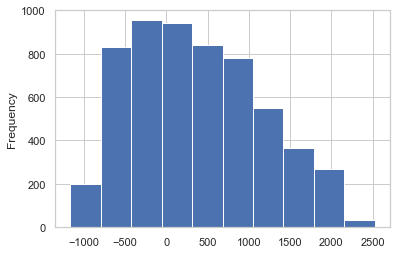

In [26]:
df['Hum_per_Dew'].plot.hist()

In [27]:
df["y_cat"] =  pd.qcut(df.y, [0, 0.5,0.7,.8,.88,.93,.97, 1], precision = 0, labels = [1, 2, 3, 4, 5,6,7]) 
# strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42,stratify=df['y_cat'])

In [28]:
features_df= df.drop(['y_cat','y'], 1)
target = pd.DataFrame(df['y'], columns=["y"])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val  = train_test_split(features_df,target, test_size=0.2,stratify=df['y_cat'], random_state=42) 

X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     4608 non-null   int64         
 1   Date                   4608 non-null   datetime64[ns]
 2   Hour                   4608 non-null   int64         
 3   Temperature            4608 non-null   float64       
 4   Humidity               4608 non-null   int64         
 5   Wind_speed             4608 non-null   float64       
 6   Visibility             4608 non-null   int64         
 7   Dew_point_temperature  4608 non-null   float64       
 8   Solar_Radiation        4608 non-null   float64       
 9   Rainfall               4608 non-null   float64       
 10  Snowfall               4608 non-null   float64       
 11  Seasons                4608 non-null   object        
 12  Holiday                4608 non-null   object        
 13  Fun

<AxesSubplot:xlabel='Seasons,Holiday,Functioning_Day'>

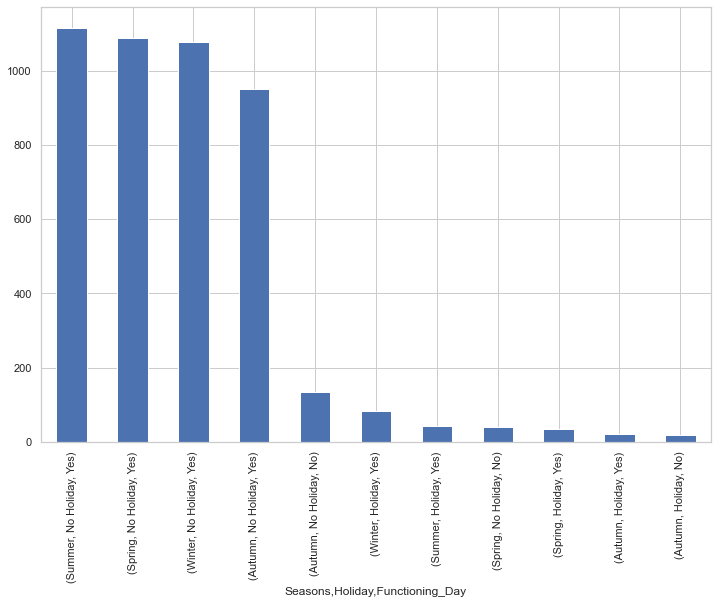

In [30]:
X_train[['Seasons','Holiday','Functioning_Day']].value_counts().plot.bar(figsize=(12,8))

In [31]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_train[['Seasons']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(X_train[['Seasons']]).toarray(),columns=colnames)

X_train = X_train.join(enc_df)

X_train.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)

X_train.Holiday.replace(to_replace=["No Holiday","Holiday"], value =[1,0], inplace = True)


In [32]:
X_train[(X_train['x0_Autumn']==1)&(X_train['Holiday']==1)&(X_train['Functioning_Day']==0)] =0
# X_train[(X_train['x0_Winter']==1)&(X_train['Holiday']==0)&(X_train['Functioning_Day']==1)] =0
# X_train[(X_train['x0_Summer']==1)&(X_train['Holiday']==0)&(X_train['Functioning_Day']==1)] =0
# X_train[(X_train['x0_Spring']==1)&(X_train['Holiday']==1)&(X_train['Functioning_Day']==0)] =0

# X_train[(X_train['x0_Spring']==1)&(X_train['Holiday']==0)&(X_train['Functioning_Day']==1)] =0
# X_train[(X_train['x0_Autumn']==1)&(X_train['Holiday']==0)&(X_train['Functioning_Day']==1)] =0
X_train[(X_train['x0_Autumn']==1)&(X_train['Holiday']==0)&(X_train['Functioning_Day']==0)] =0

# X_train.loc[(X_train['x0_Winter']==1) & (X_train['Holiday']==0),['Humidity','Temperature',
# 'Wind_speed','Visibility','Dew_point_temperature','Rainfall','Snowfall']]=0

# X_train.loc[(X_train['Rainfall']>7),'Rainfall' ] =X_train.Rainfall.median()
# X_train.loc[(X_train['Snowfall']>2),'Snowfall' ] =X_train.Snowfall.mean()
# X_train.loc[(X_train['Wind_speed']>2.7),'Wind_speed' ] =X_train.Wind_speed.median()
# # X_train.loc[(X_train['Month']>7),'Month']=X_train.Month.median()
# X_train.loc[(X_train['Temperature']>27),'Temperature']=X_train.Temperature.median()
# # X_train.loc[(X_train['Humidity']>57),'Humidity']=X_train.Humidity.median()

In [33]:
enc.fit(X_val[['Seasons']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(X_val[['Seasons']]).toarray(),columns=colnames)

X_val = X_val.join(enc_df)

X_val.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)

X_val.Holiday.replace(to_replace=["No Holiday","Holiday"], value =[1,0], inplace = True)


In [34]:
X_val[(X_val['x0_Autumn']==1)&(X_val['Holiday']==1)&(X_val['Functioning_Day']==0)] =0
# X_val[(X_val['x0_Winter']==1)&(X_val['Holiday']==0)&(X_val['Functioning_Day']==1)] =0
# X_val[(X_val['x0_Summer']==1)&(X_val['Holiday']==0)&(X_val['Functioning_Day']==1)] =0
# X_val[(X_val['x0_Spring']==1)&(X_val['Holiday']==1)&(X_val['Functioning_Day']==0)] =0

# X_val[(X_val['x0_Spring']==1)&(X_val['Holiday']==0)&(X_val['Functioning_Day']==1)] =0
# X_val[(X_val['x0_Autumn']==1)&(X_val['Holiday']==0)&(X_val['Functioning_Day']==1)] =0
X_val[(X_val['x0_Autumn']==1)&(X_val['Holiday']==0)&(X_val['Functioning_Day']==0)] =0


# X_val.loc[(X_val['x0_Winter']==1) & (X_val['Holiday']==0),['Humidity','Temperature',
# 'Wind_speed','Visibility','Dew_point_temperature','Rainfall','Snowfall']]=0

# X_val.loc[(X_val['Rainfall']>7),'Rainfall' ] =X_val.Rainfall.median()
# X_val.loc[(X_val['Snowfall']>2),'Snowfall' ] =X_val.Snowfall.mean()
# X_val.loc[(X_val['Wind_speed']>2.7),'Wind_speed' ] =X_val.Wind_speed.median()
# # X_val.loc[(X_val['Month']>7),'Month']=X_val.Month.median()
# X_val.loc[(X_val['Temperature']>27),'Temperature']=X_val.Temperature.median()
# # X_val.loc[(X_val['Humidity']>57),'Humidity']=X_val.Humidity.median()


In [35]:
X_train.columns

Index(['ID', 'Date', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month',
       'Year', 'Hum_per_Dew', 'x0_Autumn', 'x0_Spring', 'x0_Summer',
       'x0_Winter'],
      dtype='object')

In [36]:
t=['Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day', 'Month',
       'Year', 'Hum_per_Dew', 'x0_Autumn', 'x0_Summer',
       'x0_Winter']

In [37]:
# xX_train = X_train[['x0_Summer','x0_Winter','Functioning_Day','Temperature','Humidity','Snowfall','Solar_Radiation',
#                     'Day','Rainfall','Visibility','Year', 'Hour']]


# xX_val = X_val[['x0_Summer','x0_Winter','Functioning_Day','Temperature','Humidity','Snowfall','Solar_Radiation',
#                     'Day','Rainfall','Visibility','Year', 'Hour']]

xX_train = X_train[t]
xX_val = X_val[t] 

In [38]:
# # Make an instance of the Model
# pca = PCA()
# pca.fit(X_train) 

# X_train_pca = pca.transform(X_train)
# X_val_pca = pca.transform(X_val)

# X_train_pca_df = pd.DataFrame(data = X_train_pca,columns=X_train.columns)
# X_val_pca_df = pd.DataFrame(data = X_val_pca,columns=X_val.columns)

# # Lambda values (Eigon values)
# explained_variance_ratio=pca.explained_variance_ratio_
# explained_variance_ratio

# # plt.plot(range(21), pca.explained_variance_ratio_)
# # plt.plot(range(21), np.cumsum(pca.explained_variance_ratio_)) # Cummualtive frequency graph
# # plt.title("Component-wise and Cumulative Explained Variance")

# arr=explained_variance_ratio 
# sum = 0;  
# for i in range(0, 3):    
#     sum=sum+arr[i]   
# print("Sum :" + str(sum));  

# pca = PCA(n_components=10)
# pca.fit(X_train) 

# X_train_pca = pca.transform(X_train)
# X_val_pca = pca.transform(X_val)

In [39]:
# # Create an instance of the classifier
# RFR = RandomForestRegressor(random_state=3)

# # Train the classifier
# RFR_M = RFR.fit(X_train_pca, y_train)
# # print("The accuracy of the classifier on the validation set is ", (RFR.score(xX_val, y_val)))

# predictions = np.round(RFR_M.predict(X_val_pca))
# y_hat_RFR = pd.DataFrame(predictions, columns=["predicted"])
# np.sqrt(mean_squared_log_error(y_val,y_hat_RFR))

In [101]:
# Create an instance of the classifier
RFR = RandomForestRegressor(random_state=3)

# Train the classifier
RFR_M = RFR.fit(xX_train, y_train)
# print("The accuracy of the classifier on the validation set is ", (RFR.score(xX_val, y_val)))

predictions = np.round(RFR_M.predict(xX_val))
y_hat_RFR = pd.DataFrame(predictions, columns=["predicted"])
np.sqrt(mean_squared_log_error(y_val,y_hat_RFR))

In [ ]:
# 0.735952228063895

In [ ]:
#0.148832287216798

In [ ]:
scores = cross_val_score(RFR_M, xX_train,y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
pd.Series(tree_rmse_scores).describe()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 200, 300], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': [100, 300], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error',
                           return_train_score=True)
grid_search.fit(xX_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, xX_train.columns), reverse=True)

In [ ]:
xX_train.columns

In [ ]:
test=pd.read_csv('test.csv')
test_df=test.copy()
test_df.info()

In [ ]:
test_df = test_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(�C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
test_df['Date']= pd.to_datetime(test_df['Date'])
test_df['Day'] = pd.to_datetime(test_df['Date']).dt.day
test_df['Month'] = pd.to_datetime(test_df['Date']).dt.month
test_df['Year'] = pd.to_datetime(test_df['Date']).dt.year

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# We fitting only training data
enc.fit(test_df[['Seasons']])
colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(test_df[['Seasons']]).toarray(),columns=colnames)
test_df = test_df.join(enc_df)

In [ ]:
test_df.Functioning_Day.replace(to_replace=["Yes","No"], value =[1,0], inplace = True)
test_df.Holiday.replace(to_replace=["Holiday","No Holiday"], value =[1,0], inplace = True)

In [ ]:
test_df.drop('Seasons', inplace=True, axis=1)

In [ ]:
test_df.set_index('ID',inplace=True)

In [ ]:
test_df[(test_df['Functioning_Day']==0)&(test_df['x0_Spring']==1)]=0
test_df[(test_df['Functioning_Day']==0)&(test_df['x0_Autumn']==1)]=0

# test_df[(test_df['x0_Spring']==1)]=0
# test_df[(test_df['x0_Autumn']==1)]=0

# test_df[(test_df['Rainfall']>7) ] =0
# test_df[(test_df['Snowfall']>2) ] =0
# test_df[(test_df['Month']>7) ] =0
# test_df[(test_df['Wind_speed']>2.7) ] =0
# # df[(df['Temperature']>27) ] =0
# # df.loc[(df['Month']>7),'Month']=0
# test_df.loc[(test_df['Temperature']>27),'Temperature']=0
# # df.loc[(df['Dew_point_temperature']>17),'Dew_point_temperature']=0
# # df.loc[(df['Humidity']>57),'Humidity']=0
# test_df[(test_df['Dew_point_temperature']>17) & (test_df['Humidity']>50) ] =0


test_df.loc[(test_df['x0_Autumn']==1) & (test_df['Holiday']==0) ,'Humidity']=0
test_df.loc[(test_df['x0_Autumn']==1) & (test_df['Holiday']==0),'Functioning_Day']=0

test_df.loc[(test_df['x0_Winter']==1) & (test_df['Holiday']==0),['Humidity','Temperature',
'Wind_speed','Visibility','Dew_point_temperature','Rainfall','Snowfall']]=0

test_df.loc[(test_df['x0_Spring']==1 ) & ( test_df['Holiday']==1),'Functioning_Day']=0


In [ ]:
# test_df[((test_df['x0_Autumn']==1)  | (test_df['x0_Spring']==1)) & (test_df['Functioning_Day']==0)] =0

In [ ]:
# D =['Temperature', 'Humidity', 'Wind_speed','Year','Day','Month', 'Hour',
#        'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
#        'Snowfall','Holiday', 'Functioning_Day', 'x0_Autumn', 'x0_Spring', 'x0_Summer', 'x0_Winter']
# test_df.loc[( test_df['Functioning_Day']==0) & ((test_df['x0_Autumn']==1 ) | (test_df['x0_Spring']==1)  ),D]=0

In [ ]:
X_test = test_df

# You should update/remove the next line once you change the features used for training
X_test = X_test[['x0_Summer','x0_Winter','Functioning_Day','Temperature','Humidity','Snowfall','Solar_Radiation',
                    'Visibility','Year','Day','Month', 'Hour','Dew_point_temperature']]

y_test_predicted = RFR.predict(X_test)

test_df['y'] = np.round(y_test_predicted)


In [ ]:
test_df.reset_index(inplace=True)

In [ ]:
test_df[['ID', 'y']].to_csv('submission.csv', index=False)

In [ ]:
sub=pd.read_csv('submission.csv')
sub.info()

In [ ]:
sub[sub['y'] ==0]

In [ ]:
sub.y.value_counts().sort_index()

In [ ]:
len(sub.y.unique())

In [ ]:
sub[(sub['y'] <450)& (sub['y'] >0)]